# Coursework 2- Credit Risk Analytics

In this coursework, you will develop a fully compliant PD model from the data they make available, 
from the raw data to the level 2 calibration, using what you have learned in the lectures. The 
objective of the coursework is to estimate the capital requirements for the credit card company as 
if they were a bank.

In [1]:
# importing packages
import numpy as np 
import pandas as pd

# Eliminate redundant variables.

In [2]:
# Importing Credit Cards Data
# I added CC_Modeling_Data as the second sheet in CC_Variablelist by copy paste from .txt
df1 = pd.read_excel("C://Users//HAO LIN//OneDrive//Desktop//MFE//Courses//Term 1//FM 9528//Assignments//Assignment 2//CC_VariablesList.xls", sheet_name= "CC_Modeling_Data")
df1
#df2 is CC_Variable names, used to store variable list
df2 = pd.read_excel("C://Users//HAO LIN//OneDrive//Desktop//MFE//Courses//Term 1//FM 9528//Assignments//Assignment 2//CC_VariablesList.xls", sheet_name= "Competition Variables")
df2
Variable_List = df2.iloc[:, 1]
Variable_List
#variable 43 is mate education level, yet it is also called education level, which is same as variable 9
Variable_List[43] = 'MATE_EDUCATION_LEVEL'
Variable_List[43]
Variable_List

#add variable list to df1
df1 = df1.set_axis(Variable_List, axis=1, inplace=False)
df1

C:\ANACONDA3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Var_Title,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595.0,595.0,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230.0,230.0,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591.0,591.0,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545.0,545.0,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235.0,235.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591.0,591.0,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186.0,186.0,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715.0,715.0,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320.0,320.0,1


We will remove those redundant variables first (total 24 variables removed). They are:

In [3]:
df1drop = df1.drop(['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX', 'NACIONALITY', 'EDUCATION_LEVEL',
                    'STATE_OF_BIRTH', 'CITY_OF_BIRTH',
                    'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PROFESSIONAL_STATE', 
                    'PROFESSIONAL_CITY','RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH',
                    'PROFESSIONAL_BOROUGH','PROFESSIONAL_PHONE_AREA_CODE', 'PERSONAL_ASSETS_VALUE',
                    'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 
                    'MATE_EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 
                    'FLAG_ACSP_RECORD', 'PROFESSIONAL_ZIP_3'], axis = 1)
df1drop

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,...,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,5,Web,6,1,RN,Y,1.0,15.0,1,...,0,0,0,0,N,N,1,32,595.0,1
1,2,15,Carga,2,0,RJ,Y,1.0,1.0,1,...,0,0,0,0,Y,N,1,34,230.0,1
2,3,5,Web,2,0,RN,Y,1.0,NaN,1,...,0,0,0,0,N,N,1,27,591.0,0
3,4,20,Web,2,0,PE,N,NaN,NaN,1,...,0,0,0,0,N,N,1,61,545.0,0
4,5,10,Web,2,0,RJ,Y,1.0,12.0,1,...,0,0,0,0,N,N,1,48,235.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,10,0,1,2,RN,Y,1.0,14.0,1,...,0,0,1,1,N,N,1,36,591.0,1
49996,49997,25,0,1,0,SP,Y,1.0,15.0,1,...,0,0,0,0,N,N,2,21,186.0,0
49997,49998,5,Web,2,3,SP,Y,2.0,5.0,1,...,0,0,0,0,Y,Y,1,41,715.0,0
49998,49999,1,Web,1,1,MG,Y,1.0,NaN,1,...,0,0,0,0,Y,Y,1,28,320.0,1


# Treat null values.

In [4]:
#replace APPLICATION_SUBMISSION_TYPE as numbers 1, 2, 0. in order to create bins
def f(row):
    if row["APPLICATION_SUBMISSION_TYPE"] == 'Web':
        val = 1
    elif row["APPLICATION_SUBMISSION_TYPE"] == 'Carga':
        val = 2
    else:
        val = 0
    return val

df1drop['APPLICATION_SUBMISSION_TYPE'] = df1drop.apply(f, axis=1)

df1drop.fillna(df1drop.median(), inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1drop = df1drop.loc[df1drop['PERSONAL_MONTHLY_INCOME'] < 10000]

df1drop = df1drop.loc[df1drop['OTHER_INCOMES'] < 700]

df1drop = df1drop.loc[df1drop['MONTHS_IN_RESIDENCE'] < 101]

# Replace some data that does not make sense
For example, APPLICATION_SUBMISSION_TYPE should have only 2 values: Web and Carga. But we have some "0" there.

In [5]:
df1drop = df1drop.loc[df1drop['QUANT_DEPENDANTS'] <= 10]

agemedian = df1drop['AGE'].median()
agemedian

#replace those AGE <18 or >80 with median. 
def g(row):
    if row["AGE"] < 18:
        val = agemedian
    elif row["AGE"] > 80:
        val = agemedian
    else:
        val = row["AGE"]
    return val

df1drop['AGE'] = df1drop.apply(g, axis=1)

# Design 3 new variables

In [6]:
df2drop = df1drop

#first variable
df2drop["ALLOTHCARDS"] = df2drop["FLAG_VISA"] + df2drop["FLAG_MASTERCARD"] + df2drop["FLAG_DINERS"] + df2drop["FLAG_AMERICAN_EXPRESS"] + df2drop["FLAG_OTHER_CARDS"]
df2drop["ALLOTHCARDS"].describe()

def h(row):
    if row['ALLOTHCARDS'] > 0:
        val = 1
    elif row['ALLOTHCARDS'] == 0:
        val = 0
    else:
        val = 0
    return val

df2drop['HASOTHCARDS'] = df2drop.apply(h, axis=1)

df2drop["HASOTHCARDS"].describe()

#second variable - total income per dependant plus one
df2drop["INCOMEPERDEP"] = (df2drop["PERSONAL_MONTHLY_INCOME"] + df2drop["OTHER_INCOMES"])/(df2drop["QUANT_DEPENDANTS"]+1)
df2drop["INCOMEPERDEP"].describe()

#third variables 
df2drop["INCOMEAGE"] = df2drop["PERSONAL_MONTHLY_INCOME"]/(df2drop["AGE"])
df2drop["INCOMEAGE"].describe()

count    49224.000000
mean        17.919964
std         15.409514
min          1.132075
25%          8.789474
50%         13.916667
75%         21.568627
max        290.933333
Name: INCOMEAGE, dtype: float64

# Remove correlated features.
Now we need to do a final correlation analysis. WoE might introduce correlation effects which were originally not present. For this, we can use seaborn and the corr function in numpy.

What is a “high” correlation?

◦ In general, we will keep those with 𝜌 < 0.5

◦ If 0.5 < 𝜌 < 0.7 it is better to delete if possible.

◦ 𝜌 > 0.7 pick one. Which one? Rule of thumb: The one with highest correlation with target variable.

In [7]:
# Creating a correlation matrix for the variables
earlycorr = df2drop.corr()
earlycorr = np.abs(earlycorr)
earlycorr

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,...,QUANT_BANKING_ACCOUNTS,QUANT_CARS,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,ALLOTHCARDS,HASOTHCARDS,INCOMEPERDEP,INCOMEAGE
Var_Title,,,,,,,,,,,,,,,,,,,,,
ID_CLIENT,1.000000,0.003080,0.009845,0.000564,0.003099,0.000608,0.005767,0.000520,0.007887,0.003080,...,0.006521,0.007431,0.002403,0.003647,0.001493,0.011138,0.000926,0.002915,0.004658,0.006340
PAYMENT_DAY,0.003080,1.000000,0.017038,0.042136,0.007833,0.007055,0.029794,0.019424,0.034828,0.004363,...,0.016452,0.022772,0.006417,0.149588,0.064087,0.070810,0.005723,0.006401,0.033952,0.013965
APPLICATION_SUBMISSION_TYPE,0.009845,0.017038,1.000000,0.019388,0.003783,0.014610,0.032783,0.577267,0.005179,0.021663,...,0.799819,0.809635,0.034983,0.018157,0.012158,0.019198,0.059450,0.065881,0.008502,0.000624
MARITAL_STATUS,0.000564,0.042136,0.019388,1.000000,0.037014,0.002131,0.061949,0.022839,0.019457,0.051311,...,0.006828,0.010939,0.009922,0.230643,0.014067,0.029680,0.003692,0.000879,0.009736,0.062918
QUANT_DEPENDANTS,0.003099,0.007833,0.003783,0.037014,1.000000,0.004282,0.034598,0.005507,0.035694,0.011627,...,0.030226,0.028382,0.007959,0.038962,0.039829,0.012770,0.022853,0.026929,0.318571,0.032624
RESIDENCE_TYPE,0.000608,0.007055,0.014610,0.002131,0.004282,1.000000,0.088888,0.001616,0.034314,0.003662,...,0.008587,0.002192,0.001615,0.108899,0.004344,0.018976,0.016638,0.014174,0.035130,0.013304
MONTHS_IN_RESIDENCE,0.005767,0.029794,0.032783,0.061949,0.034598,0.088888,1.000000,0.035957,0.012147,0.073709,...,0.031332,0.024173,0.018856,0.208241,0.051288,0.028463,0.081208,0.085661,0.038139,0.062993
FLAG_EMAIL,0.000520,0.019424,0.577267,0.022839,0.005507,0.001616,0.035957,1.000000,0.000832,0.029656,...,0.616999,0.696780,0.004659,0.016301,0.017852,0.008380,0.001142,0.003708,0.006833,0.004212
PERSONAL_MONTHLY_INCOME,0.007887,0.034828,0.005179,0.019457,0.035694,0.034314,0.012147,0.000832,1.000000,0.038477,...,0.037015,0.019299,0.009946,0.074380,0.005831,0.018025,0.152658,0.137766,0.846311,0.890138


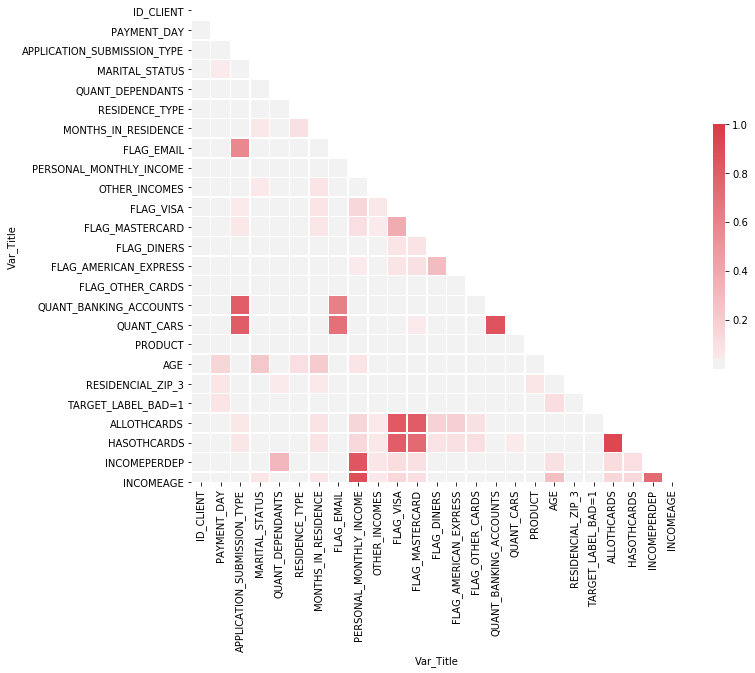

In [8]:
# Eliminating duplicates from the correlation matrix
mask = np.triu(np.ones_like(earlycorr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
corrmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(earlycorr, mask=mask, cmap=corrmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df2drop = df2drop.drop(['QUANT_CARS','QUANT_BANKING_ACCOUNTS', 'APPLICATION_SUBMISSION_TYPE', 'PERSONAL_MONTHLY_INCOME',
                        'FLAG_VISA', 'OTHER_INCOMES', 'ALLOTHCARDS',
                       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS'], axis=1)
df2drop

Var_Title,ID_CLIENT,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,HASOTHCARDS,INCOMEPERDEP,INCOMEAGE
0,1,5,6,1,RN,Y,1.0,15.0,1,N,N,1,32.0,595.0,1,1,450.000000,28.125000
1,2,15,2,0,RJ,Y,1.0,1.0,1,Y,N,1,34.0,230.0,1,0,750.000000,22.058824
2,3,5,2,0,RN,Y,1.0,6.0,1,N,N,1,27.0,591.0,0,0,500.000000,18.518519
3,4,20,2,0,PE,N,1.0,6.0,1,N,N,1,61.0,545.0,0,0,500.000000,8.196721
4,5,10,2,0,RJ,Y,1.0,12.0,1,N,N,1,48.0,235.0,1,0,1200.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,10,1,2,RN,Y,1.0,14.0,1,N,N,1,36.0,591.0,1,0,483.666667,40.305556
49996,49997,25,1,0,SP,Y,1.0,15.0,1,N,N,2,21.0,186.0,0,0,450.000000,21.428571
49997,49998,5,2,3,SP,Y,2.0,5.0,1,Y,Y,1,41.0,715.0,0,0,388.750000,37.926829
49998,49999,1,1,1,MG,Y,1.0,6.0,1,Y,Y,1,28.0,320.0,1,0,721.635000,51.545357


In [10]:
# Creating a correlation matrix for the variables
early_NoHighCorr = df2drop.corr()
early_NoHighCorr = np.abs(early_NoHighCorr)
early_NoHighCorr

Var_Title,ID_CLIENT,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,HASOTHCARDS,INCOMEPERDEP,INCOMEAGE
Var_Title,,,,,,,,,,,,,,
ID_CLIENT,1.000000,0.003080,0.000564,0.003099,0.000608,0.005767,0.000520,0.002403,0.003647,0.001493,0.011138,0.002915,0.004658,0.006340
PAYMENT_DAY,0.003080,1.000000,0.042136,0.007833,0.007055,0.029794,0.019424,0.006417,0.149588,0.064087,0.070810,0.006401,0.033952,0.013965
MARITAL_STATUS,0.000564,0.042136,1.000000,0.037014,0.002131,0.061949,0.022839,0.009922,0.230643,0.014067,0.029680,0.000879,0.009736,0.062918
QUANT_DEPENDANTS,0.003099,0.007833,0.037014,1.000000,0.004282,0.034598,0.005507,0.007959,0.038962,0.039829,0.012770,0.026929,0.318571,0.032624
RESIDENCE_TYPE,0.000608,0.007055,0.002131,0.004282,1.000000,0.088888,0.001616,0.001615,0.108899,0.004344,0.018976,0.014174,0.035130,0.013304
MONTHS_IN_RESIDENCE,0.005767,0.029794,0.061949,0.034598,0.088888,1.000000,0.035957,0.018856,0.208241,0.051288,0.028463,0.085661,0.038139,0.062993
FLAG_EMAIL,0.000520,0.019424,0.022839,0.005507,0.001616,0.035957,1.000000,0.004659,0.016301,0.017852,0.008380,0.003708,0.006833,0.004212
PRODUCT,0.002403,0.006417,0.009922,0.007959,0.001615,0.018856,0.004659,1.000000,0.000468,0.069106,0.018415,0.010913,0.009483,0.010168
AGE,0.003647,0.149588,0.230643,0.038962,0.108899,0.208241,0.016301,0.000468,1.000000,0.005255,0.116008,0.023971,0.101074,0.280073


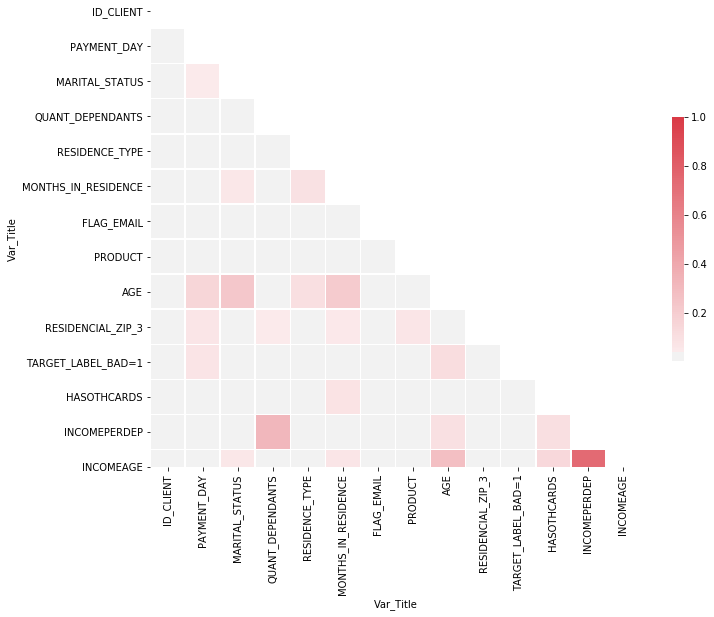

In [11]:
# Eliminating duplicates from the correlation matrix
mask = np.triu(np.ones_like(early_NoHighCorr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
corrmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(early_NoHighCorr, mask=mask, cmap=corrmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# WOE

##2. (15%) Calculate the WoE and perform the variable selection procedures you see fit. Explain your decisions.

## Binning

The first step is to properly bin the data. Usually, we will run a tree and manually adjust those cases that do not follow a logical pattern.

However, as calculating WoE means we need to use the objective variable, we need to first create a train and test split. The scorecard package comes with a function to do so easily,  ```split_df```, which takes as an argument the ratio and the seed.

**Note: A random seed is used to generate a random split that will be reproducible (is there such as thing as randomness in a computer?). I expect for all coursework for you to use your student ID.**

In [80]:
#!pip install scorecardpy

In [12]:
import scorecardpy as sc

In [13]:
df3drop = df2drop

# Split in train and test BEFORE we apply WoE
# Use your Student ID as seed!

train, test = sc.split_df(df3drop.iloc[:,1:],
                          y = 'TARGET_LABEL_BAD=1',
                          ratio = 0.7,
                          seed = 251093007).values()

[INFO] creating woe binning ...
Binning on 34456 rows and 17 columns in 00:00:13


{'INCOMEPERDEP':        variable             bin  count  count_distr  good   bad   badprob  \
 0  INCOMEPERDEP    [-inf,180.0)   4554     0.132169  3297  1257  0.276021   
 1  INCOMEPERDEP   [180.0,300.0)   4365     0.126683  3279  1086  0.248797   
 2  INCOMEPERDEP   [300.0,380.0)   6586     0.191142  4838  1748  0.265411   
 3  INCOMEPERDEP   [380.0,400.0)   1510     0.043824  1196   314  0.207947   
 4  INCOMEPERDEP   [400.0,520.0)   5347     0.155183  3830  1517  0.283710   
 5  INCOMEPERDEP  [520.0,1760.0)  10930     0.317216  8109  2821  0.258097   
 6  INCOMEPERDEP    [1760.0,inf)   1164     0.033782   909   255  0.219072   
 
         woe    bin_iv  total_iv  breaks  is_special_values  
 0  0.075743  0.000772  0.008833   180.0              False  
 1 -0.065010  0.000527  0.008833   300.0              False  
 2  0.021999  0.000093  0.008833   380.0              False  
 3 -0.297317  0.003592  0.008833   400.0              False  
 4  0.113898  0.002067  0.008833   520.0        

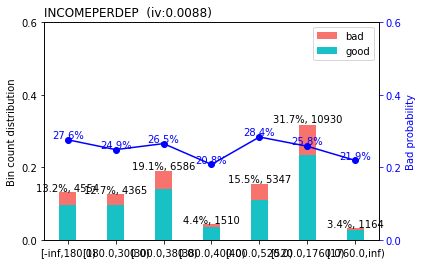

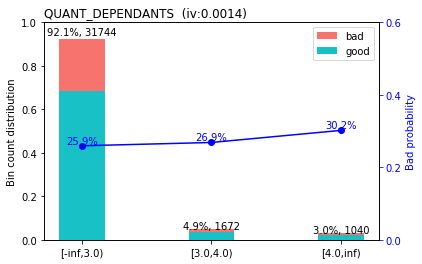

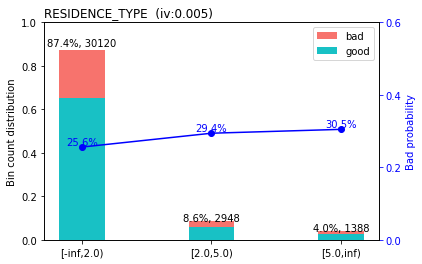

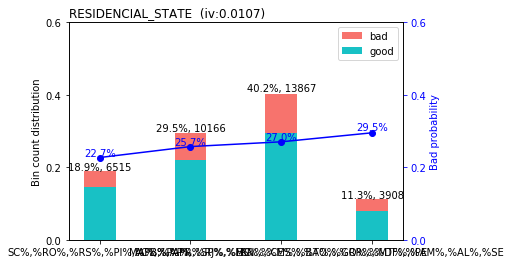

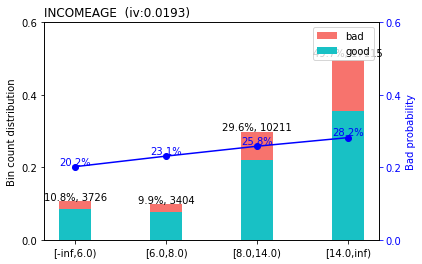

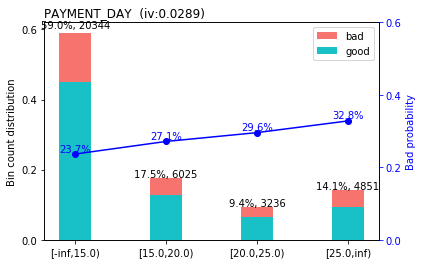

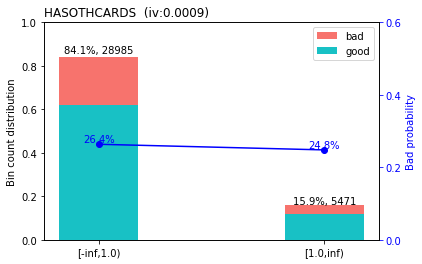

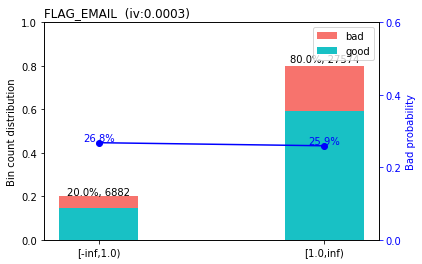

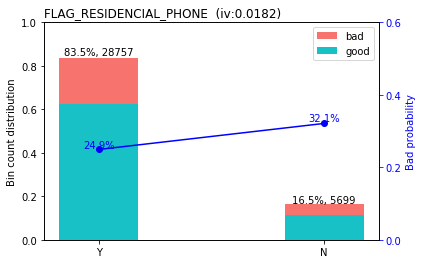

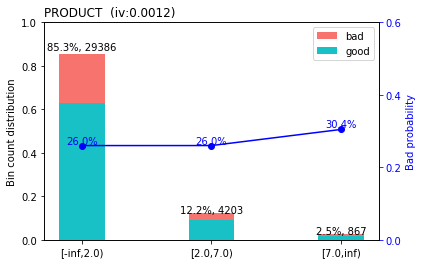

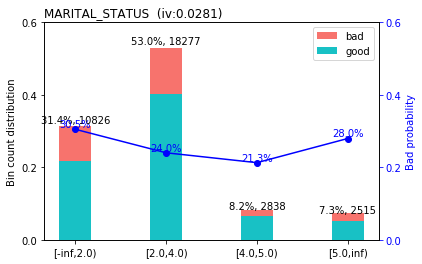

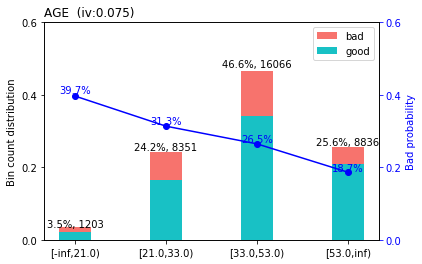

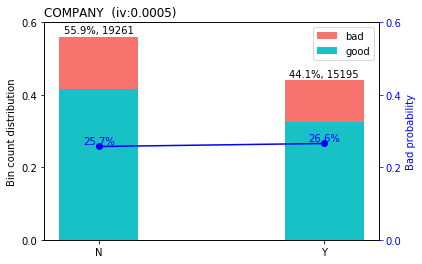

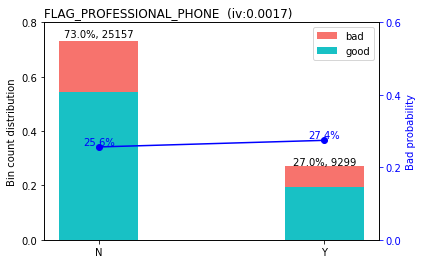

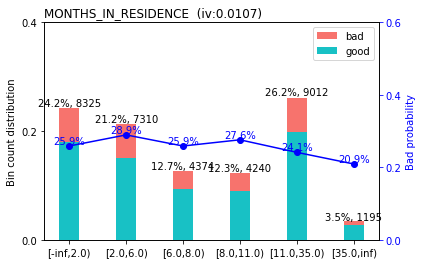

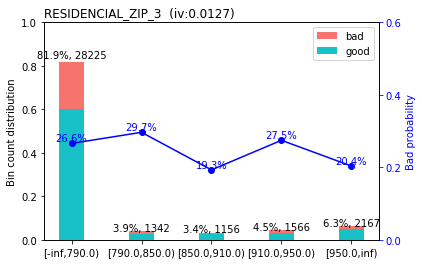

In [14]:
bins = sc.woebin(train, y = 'TARGET_LABEL_BAD=1', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=50, # Maximum number of bins
                 method='tree'
                 )

sc.woebin_plot(bins)

bins

## Manual adjustment

No explainable trends, so we need to make manual adjustments. 

**The output of the binning function is the best possible binning from a statistical point of view. Changing it will only make the IV go down.** As the IV of OthDebt is really close to 1, you need to make a call. How many variables do you have available? If plenty, then you can drop the variable, otherwise, you should leave it and see if this can be sorted out later.

```woebin_adj``` that allows us to make adjustments one by one, only for those variables with irregular trends (this can be changed in the options). We start by invoking the function, note the bar at the end.

-------- 1/16 INCOMEPERDEP --------
>>> dt[INCOMEPERDEP].describe(): 
count    34456.000000
mean       562.768847
std        567.659851
min         22.800000
25%        285.000000
50%        400.000000
75%        656.000000
max       9944.000000
Name: INCOMEPERDEP, dtype: float64 



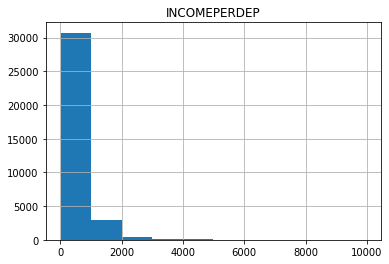

>>> Current breaks:
180.0,300.0,380.0,400.0,520.0,1760.0 



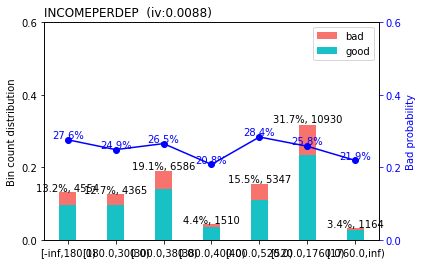

>>> Adjust breaks for (1/16) INCOMEPERDEP?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/16 QUANT_DEPENDANTS --------
>>> dt[QUANT_DEPENDANTS].describe(): 
count    34456.000000
mean         0.641166
std          1.151219
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: QUANT_DEPENDANTS, dtype: float64 



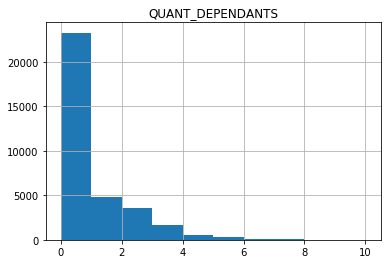

>>> Current breaks:
3.0,4.0 



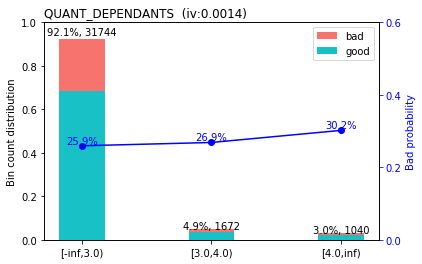

>>> Adjust breaks for (2/16) QUANT_DEPENDANTS?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/16 RESIDENCE_TYPE --------
>>> dt[RESIDENCE_TYPE].describe(): 
count    34456.000000
mean         1.246575
std          0.860779
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: RESIDENCE_TYPE, dtype: float64 

>>> dt[RESIDENCE_TYPE].value_counts(): 
1.0    29604
2.0     2644
5.0     1388
0.0      516
4.0      208
3.0       96
Name: RESIDENCE_TYPE, dtype: int64 

>>> Current breaks:
2.0,5.0 



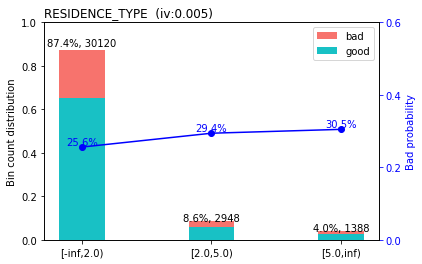

>>> Adjust breaks for (3/16) RESIDENCE_TYPE?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/16 RESIDENCIAL_STATE --------
>>> dt[RESIDENCIAL_STATE].describe(): 
count     34456
unique       27
top          SP
freq       5953
Name: RESIDENCIAL_STATE, dtype: object 

>>> dt[RESIDENCIAL_STATE].value_counts(): 
SP    5953
RS    3602
BA    3483
CE    3274
PE    2582
MG    2114
PA    1570
RJ    1499
RN    1371
GO    1174
PR    1047
AL    1007
PB     936
MT     879
MA     529
DF     487
MS     483
ES     482
SC     437
AP     335
AM     265
PI     252
RO     241
AC     159
SE     157
TO      97
RR      41
Name: RESIDENCIAL_STATE, dtype: int64 

>>> Current breaks:
'SC%,%RO%,%RS%,%PI%,%PB%,%PR','MA%,%PA%,%SP%,%MG','AC%,%AP%,%RJ%,%ES%,%CE%,%BA%,%GO%,%MT%,%PE','RN%,%MS%,%TO%,%RR%,%DF%,%AM%,%AL%,%SE' 



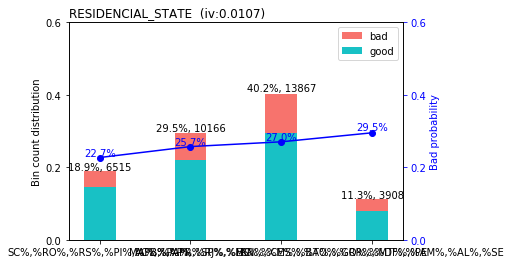

>>> Adjust breaks for (4/16) RESIDENCIAL_STATE?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/16 INCOMEAGE --------
>>> dt[INCOMEAGE].describe(): 
count    34456.000000
mean        17.895930
std         15.408884
min          1.533333
25%          8.771930
50%         13.888889
75%         21.527090
max        290.933333
Name: INCOMEAGE, dtype: float64 



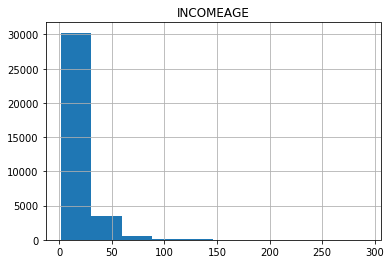

>>> Current breaks:
6.0,8.0,14.0 



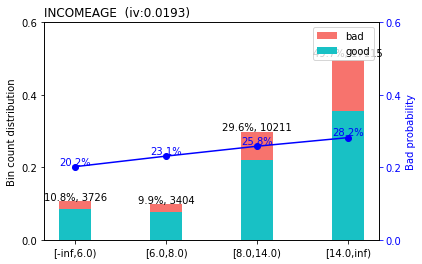

>>> Adjust breaks for (5/16) INCOMEAGE?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/16 PAYMENT_DAY --------
>>> dt[PAYMENT_DAY].describe(): 
count    34456.000000
mean        12.869312
std          6.614607
min          1.000000
25%         10.000000
50%         10.000000
75%         15.000000
max         25.000000
Name: PAYMENT_DAY, dtype: float64 

>>> dt[PAYMENT_DAY].value_counts(): 
10    14035
15     6025
5      5099
25     4851
20     3236
1      1210
Name: PAYMENT_DAY, dtype: int64 

>>> Current breaks:
15.0,20.0,25.0 



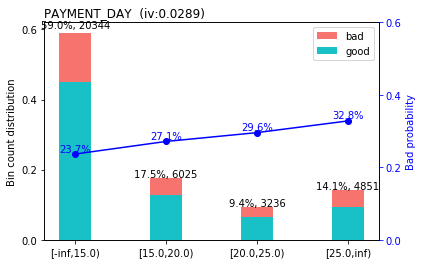

>>> Adjust breaks for (6/16) PAYMENT_DAY?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/16 HASOTHCARDS --------
>>> dt[HASOTHCARDS].describe(): 
count    34456.000000
mean         0.158782
std          0.365478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASOTHCARDS, dtype: float64 

>>> dt[HASOTHCARDS].value_counts(): 
0    28985
1     5471
Name: HASOTHCARDS, dtype: int64 

>>> Current breaks:
1.0 



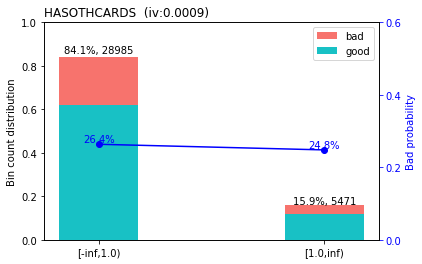

>>> Adjust breaks for (7/16) HASOTHCARDS?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/16 FLAG_EMAIL --------
>>> dt[FLAG_EMAIL].describe(): 
count    34456.000000
mean         0.800267
std          0.399805
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FLAG_EMAIL, dtype: float64 

>>> dt[FLAG_EMAIL].value_counts(): 
1    27574
0     6882
Name: FLAG_EMAIL, dtype: int64 

>>> Current breaks:
1.0 



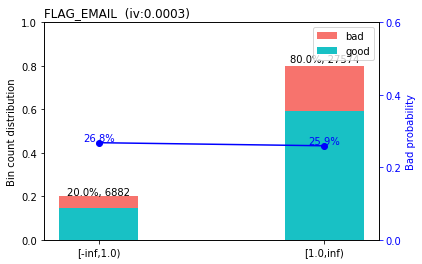

>>> Adjust breaks for (8/16) FLAG_EMAIL?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/16 FLAG_RESIDENCIAL_PHONE --------
>>> dt[FLAG_RESIDENCIAL_PHONE].describe(): 
count     34456
unique        2
top           Y
freq      28757
Name: FLAG_RESIDENCIAL_PHONE, dtype: object 

>>> dt[FLAG_RESIDENCIAL_PHONE].value_counts(): 
Y    28757
N     5699
Name: FLAG_RESIDENCIAL_PHONE, dtype: int64 

>>> Current breaks:
'Y','N' 



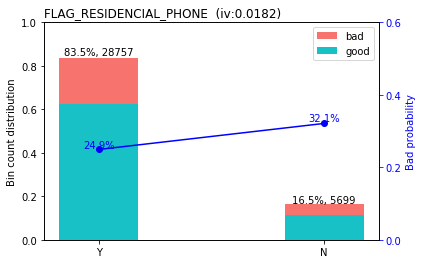

>>> Adjust breaks for (9/16) FLAG_RESIDENCIAL_PHONE?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/16 PRODUCT --------
>>> dt[PRODUCT].describe(): 
count    34456.000000
mean         1.272957
std          0.976399
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: PRODUCT, dtype: float64 

>>> dt[PRODUCT].value_counts(): 
1    29386
2     4203
7      867
Name: PRODUCT, dtype: int64 

>>> Current breaks:
2.0,7.0 



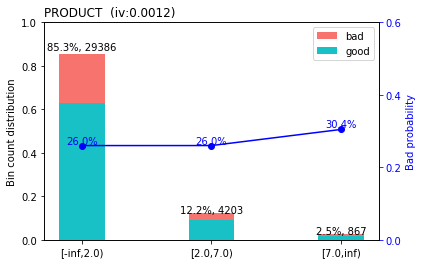

>>> Adjust breaks for (10/16) PRODUCT?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/16 MARITAL_STATUS --------
>>> dt[MARITAL_STATUS].describe(): 
count    34456.000000
mean         2.137160
std          1.318827
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: MARITAL_STATUS, dtype: float64 

>>> dt[MARITAL_STATUS].value_counts(): 
2    17820
1    10682
4     2838
6     1270
5      871
3      457
7      374
0      144
Name: MARITAL_STATUS, dtype: int64 

>>> Current breaks:
2.0,4.0,5.0 



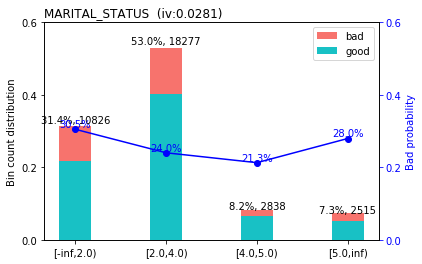

>>> Adjust breaks for (11/16) MARITAL_STATUS?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/16 AGE --------
>>> dt[AGE].describe(): 
count    34456.000000
mean        42.828013
std         14.454182
min         18.000000
25%         31.000000
50%         41.000000
75%         53.000000
max         80.000000
Name: AGE, dtype: float64 



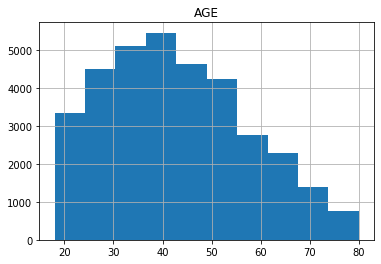

>>> Current breaks:
21.0,33.0,53.0 



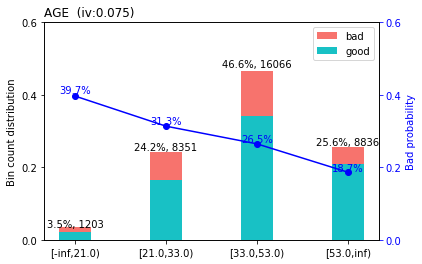

>>> Adjust breaks for (12/16) AGE?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/16 COMPANY --------
>>> dt[COMPANY].describe(): 
count     34456
unique        2
top           N
freq      19261
Name: COMPANY, dtype: object 

>>> dt[COMPANY].value_counts(): 
N    19261
Y    15195
Name: COMPANY, dtype: int64 

>>> Current breaks:
'N','Y' 



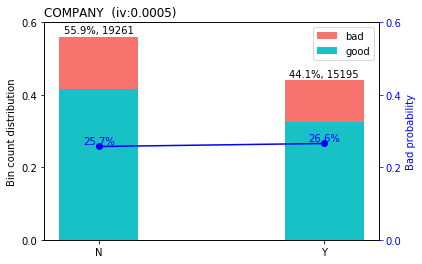

>>> Adjust breaks for (13/16) COMPANY?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/16 FLAG_PROFESSIONAL_PHONE --------
>>> dt[FLAG_PROFESSIONAL_PHONE].describe(): 
count     34456
unique        2
top           N
freq      25157
Name: FLAG_PROFESSIONAL_PHONE, dtype: object 

>>> dt[FLAG_PROFESSIONAL_PHONE].value_counts(): 
N    25157
Y     9299
Name: FLAG_PROFESSIONAL_PHONE, dtype: int64 

>>> Current breaks:
'N','Y' 



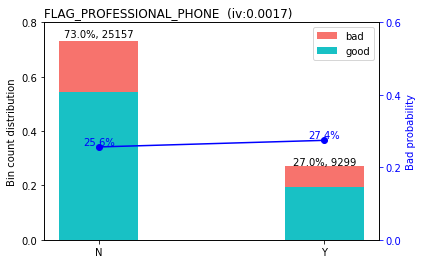

>>> Adjust breaks for (14/16) FLAG_PROFESSIONAL_PHONE?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/16 MONTHS_IN_RESIDENCE --------
>>> dt[MONTHS_IN_RESIDENCE].describe(): 
count    34456.000000
mean         9.440794
std         10.231174
min          0.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        100.000000
Name: MONTHS_IN_RESIDENCE, dtype: float64 



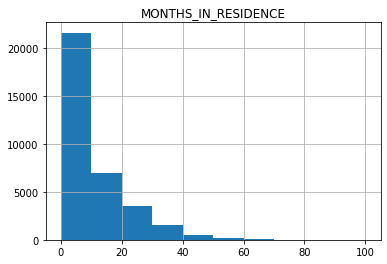

>>> Current breaks:
2.0,6.0,8.0,11.0,35.0 



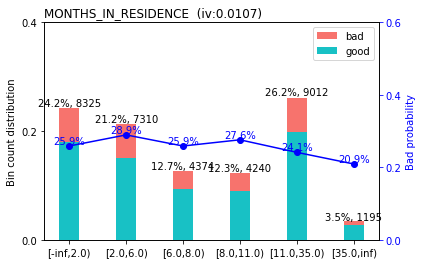

>>> Adjust breaks for (15/16) MONTHS_IN_RESIDENCE?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/16 RESIDENCIAL_ZIP_3 --------
>>> dt[RESIDENCIAL_ZIP_3].describe(): 
count    34456.000000
mean       584.685454
std        226.956662
min        110.000000
25%        450.000000
50%        600.000000
75%        730.000000
max        999.000000
Name: RESIDENCIAL_ZIP_3, dtype: float64 



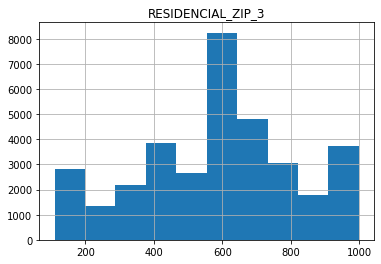

>>> Current breaks:
790.0,850.0,910.0,950.0 



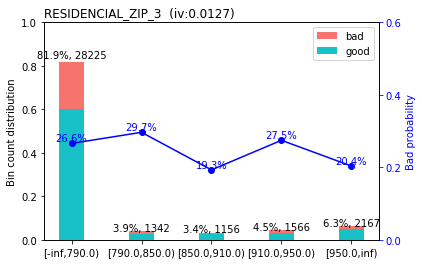

>>> Adjust breaks for (16/16) RESIDENCIAL_ZIP_3?
1: next 
2: yes 
3: back
Selection: 1


In [15]:
breaks_adj = sc.woebin_adj(train, "Default", bins, adj_all_var = True)

The variables are now much better behaved. Play around with the breaks to see if you can get to better solutions. Income is a tricky variable: Its IV is 0.13 in the original (incorrect) binning, but the corrected one is (really slightly) below 0.1 so it would be discarded. Should we with a variable that close to 1? We could play around a bit more to see if we can get it to be rational.

Now that we are happy with the binnings, we need to apply it to both of our datasets

In [17]:
#breaks_adj

In [18]:
bins_adj = sc.woebin(train, y="TARGET_LABEL_BAD=1", breaks_list=breaks_adj) # Apply new cuts
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


## Final correlation analysis

Now we need to do a final correlation analysis. WoE might introduce correlation effects which were originally not present. For this, we can use seaborn and the corr function in numpy.

What is a “high” correlation?

◦ In general, we will keep those with 𝜌 < 0.5

◦ If 0.5 < 𝜌 < 0.7 it is better to delete if possible.

◦ 𝜌 > 0.7 pick one. Which one? Rule of thumb: The one with highest correlation with target variable.

In [19]:
# Creating a correlation matrix for the variables
woecorr = train_woe.corr()
woecorr = np.abs(woecorr)
woecorr

,TARGET_LABEL_BAD=1,FLAG_RESIDENCIAL_PHONE_woe,INCOMEPERDEP_woe,RESIDENCIAL_ZIP_3_woe,QUANT_DEPENDANTS_woe,PRODUCT_woe,MARITAL_STATUS_woe,AGE_woe,RESIDENCIAL_STATE_woe,INCOMEAGE_woe,PAYMENT_DAY_woe,COMPANY_woe,FLAG_PROFESSIONAL_PHONE_woe,HASOTHCARDS_woe,MONTHS_IN_RESIDENCE_woe,FLAG_EMAIL_woe,RESIDENCE_TYPE_woe
TARGET_LABEL_BAD=1,1.000000,0.060772,0.040558,0.047782,0.016973,0.015857,0.073933,0.118688,0.045035,0.059620,0.075918,0.009436,0.018400,0.012966,0.045228,0.007735,0.031666
FLAG_RESIDENCIAL_PHONE_woe,0.060772,1.000000,0.013676,0.017621,0.000910,0.005325,0.125324,0.199013,0.019469,0.222711,0.061096,0.009244,0.019524,0.042725,0.019033,0.020570,0.009735
INCOMEPERDEP_woe,0.040558,0.013676,1.000000,0.011748,0.133173,0.012271,0.022880,0.081581,0.013049,0.044841,0.021905,0.013715,0.015192,0.034046,0.022915,0.049991,0.003452
RESIDENCIAL_ZIP_3_woe,0.047782,0.017621,0.011748,1.000000,0.023941,0.012858,0.007501,0.019075,0.461016,0.004901,0.049549,0.008096,0.004658,0.002396,0.034469,0.018271,0.011080
QUANT_DEPENDANTS_woe,0.016973,0.000910,0.133173,0.023941,1.000000,0.006495,0.046040,0.026142,0.011235,0.016702,0.004052,0.010644,0.005490,0.012502,0.003129,0.001861,0.001717
PRODUCT_woe,0.015857,0.005325,0.012271,0.012858,0.006495,1.000000,0.006449,0.014829,0.012767,0.010243,0.002783,0.020744,0.008406,0.006182,0.007305,0.006406,0.008369
MARITAL_STATUS_woe,0.073933,0.125324,0.022880,0.007501,0.046040,0.006449,1.000000,0.304581,0.022299,0.151707,0.069581,0.103151,0.133844,0.006514,0.066275,0.036725,0.053587
AGE_woe,0.118688,0.199013,0.081581,0.019075,0.026142,0.014829,0.304581,1.000000,0.013808,0.545260,0.155862,0.225338,0.260577,0.022758,0.175581,0.021155,0.092462
RESIDENCIAL_STATE_woe,0.045035,0.019469,0.013049,0.461016,0.011235,0.012767,0.022299,0.013808,1.000000,0.038655,0.038930,0.066554,0.048164,0.023994,0.032446,0.000560,0.005884
INCOMEAGE_woe,0.059620,0.222711,0.044841,0.004901,0.016702,0.010243,0.151707,0.545260,0.038655,1.000000,0.101171,0.236758,0.248428,0.106352,0.108552,0.001377,0.043960


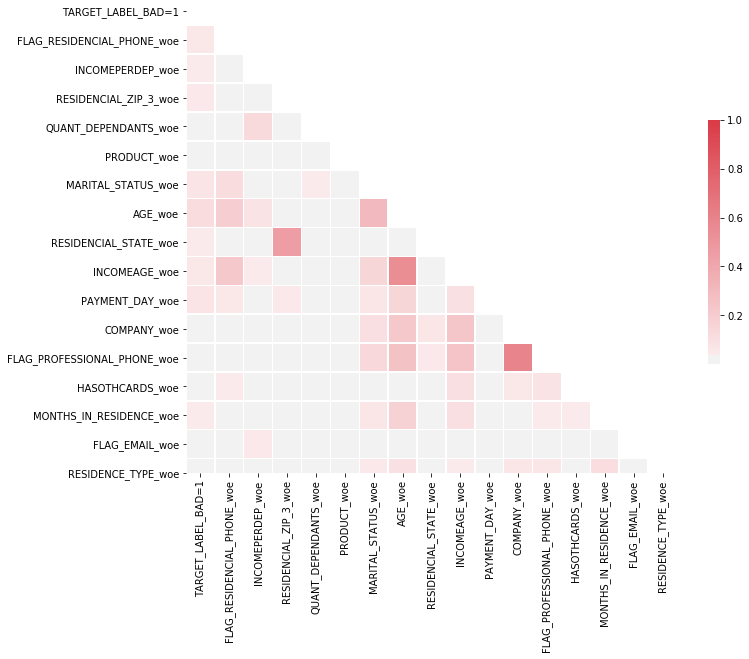

In [20]:
# Eliminating duplicates from the correlation matrix
mask = np.triu(np.ones_like(woecorr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
corrmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(woecorr, mask=mask, cmap=corrmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
# dropping one of the high correlated var...
train_woe_NoHighCorr = train_woe.drop(['AGE_woe', 'COMPANY_woe'], axis=1)
train = train.drop(['AGE', 'COMPANY'], axis=1)

# dropping one of the high correlated var... (same to test)
test_woe_NoHighCorr = test_woe.drop(['AGE_woe', 'COMPANY_woe'], axis=1)
test = test.drop(['AGE', 'COMPANY'], axis=1)

In [22]:
train

Var_Title,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,FLAG_PROFESSIONAL_PHONE,PRODUCT,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,HASOTHCARDS,INCOMEPERDEP,INCOMEAGE
0,5,6,1,RN,Y,1.0,15.0,1,N,1,595.0,1,1,450.000000,28.125000
1,15,2,0,RJ,Y,1.0,1.0,1,N,1,230.0,1,0,750.000000,22.058824
2,5,2,0,RN,Y,1.0,6.0,1,N,1,591.0,0,0,500.000000,18.518519
4,10,2,0,RJ,Y,1.0,12.0,1,N,1,235.0,1,0,1200.000000,25.000000
7,25,1,0,SP,N,1.0,4.0,1,Y,1,686.0,0,0,489.000000,17.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,1,2,0,BA,Y,1.0,4.0,1,N,1,440.0,1,1,1100.000000,25.000000
49995,10,1,2,RN,Y,1.0,14.0,1,N,1,591.0,1,0,483.666667,40.305556
49997,5,2,3,SP,Y,2.0,5.0,1,Y,1,715.0,0,0,388.750000,37.926829
49998,1,1,1,MG,Y,1.0,6.0,1,Y,1,320.0,1,0,721.635000,51.545357


In [23]:
test

Var_Title,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,FLAG_PROFESSIONAL_PHONE,PRODUCT,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,HASOTHCARDS,INCOMEPERDEP,INCOMEAGE
3,20,2,0,PE,N,1.0,6.0,1,N,1,545.0,0,0,500.000000,8.196721
5,10,2,0,MG,Y,1.0,4.0,1,N,2,371.0,1,0,500.000000,12.500000
6,15,2,2,BA,Y,1.0,1.0,1,N,1,413.0,1,0,106.666667,8.000000
11,15,1,1,MG,Y,1.0,6.0,1,Y,2,384.0,0,0,201.500000,13.896552
22,1,2,2,DF,Y,5.0,4.0,1,Y,1,722.0,0,1,322.100000,24.776923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,1,5,1,RS,Y,1.0,19.0,1,N,1,962.0,0,0,250.000000,8.771930
49987,15,2,0,SP,N,1.0,5.0,1,N,1,882.0,0,0,533.000000,7.838235
49989,10,2,0,RN,Y,1.0,5.0,1,N,1,596.0,0,0,700.000000,10.937500
49994,10,2,4,RS,Y,1.0,38.0,1,Y,1,948.0,1,1,73.600000,9.684211


In [24]:
# Creating a correlation matrix for the variables
woecorr2 = train_woe_NoHighCorr.corr()
woecorr2 = np.abs(woecorr2)
woecorr2

,TARGET_LABEL_BAD=1,FLAG_RESIDENCIAL_PHONE_woe,INCOMEPERDEP_woe,RESIDENCIAL_ZIP_3_woe,QUANT_DEPENDANTS_woe,PRODUCT_woe,MARITAL_STATUS_woe,RESIDENCIAL_STATE_woe,INCOMEAGE_woe,PAYMENT_DAY_woe,FLAG_PROFESSIONAL_PHONE_woe,HASOTHCARDS_woe,MONTHS_IN_RESIDENCE_woe,FLAG_EMAIL_woe,RESIDENCE_TYPE_woe
TARGET_LABEL_BAD=1,1.000000,0.060772,0.040558,0.047782,0.016973,0.015857,0.073933,0.045035,0.059620,0.075918,0.018400,0.012966,0.045228,0.007735,0.031666
FLAG_RESIDENCIAL_PHONE_woe,0.060772,1.000000,0.013676,0.017621,0.000910,0.005325,0.125324,0.019469,0.222711,0.061096,0.019524,0.042725,0.019033,0.020570,0.009735
INCOMEPERDEP_woe,0.040558,0.013676,1.000000,0.011748,0.133173,0.012271,0.022880,0.013049,0.044841,0.021905,0.015192,0.034046,0.022915,0.049991,0.003452
RESIDENCIAL_ZIP_3_woe,0.047782,0.017621,0.011748,1.000000,0.023941,0.012858,0.007501,0.461016,0.004901,0.049549,0.004658,0.002396,0.034469,0.018271,0.011080
QUANT_DEPENDANTS_woe,0.016973,0.000910,0.133173,0.023941,1.000000,0.006495,0.046040,0.011235,0.016702,0.004052,0.005490,0.012502,0.003129,0.001861,0.001717
PRODUCT_woe,0.015857,0.005325,0.012271,0.012858,0.006495,1.000000,0.006449,0.012767,0.010243,0.002783,0.008406,0.006182,0.007305,0.006406,0.008369
MARITAL_STATUS_woe,0.073933,0.125324,0.022880,0.007501,0.046040,0.006449,1.000000,0.022299,0.151707,0.069581,0.133844,0.006514,0.066275,0.036725,0.053587
RESIDENCIAL_STATE_woe,0.045035,0.019469,0.013049,0.461016,0.011235,0.012767,0.022299,1.000000,0.038655,0.038930,0.048164,0.023994,0.032446,0.000560,0.005884
INCOMEAGE_woe,0.059620,0.222711,0.044841,0.004901,0.016702,0.010243,0.151707,0.038655,1.000000,0.101171,0.248428,0.106352,0.108552,0.001377,0.043960
PAYMENT_DAY_woe,0.075918,0.061096,0.021905,0.049549,0.004052,0.002783,0.069581,0.038930,0.101171,1.000000,0.030516,0.021031,0.029663,0.018068,0.010562


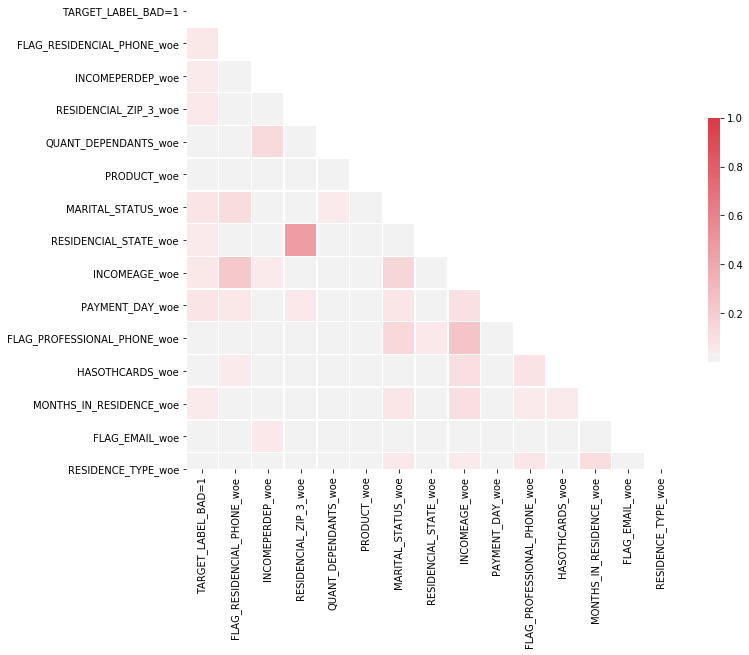

In [25]:
# Eliminating duplicates from the correlation matrix
mask = np.triu(np.ones_like(woecorr2, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
corrmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(woecorr2, mask=mask, cmap=corrmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are no apparent variables that are highly correlated, except for OthDebt and CredDebt which are negatively correlated with income. Let's keep an eye on them. In a logistic regression, **all coefficients should be positive**, otherwise there are correlations effects at play.

## Information Value Filtering

Now we can check the information value of our variables and remove those who are not predictive. We use the function ```iv```. In general:

- $IV < 0.02$: No predictive ability, remove.
- $0.02 \le IV < 0.1$: Small predictive ability, suggest to remove.
- $0.1 \le IV < 0.3$: Medium predictive ability, leave.
- $0.3 \le IV < 1$: Good predictive ability, leave.
- $1 \le IV $: Strong predictive ability. Suspicious variable. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [26]:
sc.iv(train_woe_NoHighCorr, 'TARGET_LABEL_BAD=1')

,variable,info_value
8,PAYMENT_DAY_woe,0.028924
2,MARITAL_STATUS_woe,0.028097
3,INCOMEAGE_woe,0.019318
1,FLAG_RESIDENCIAL_PHONE_woe,0.018190
6,RESIDENCIAL_ZIP_3_woe,0.012718
13,MONTHS_IN_RESIDENCE_woe,0.010718
11,RESIDENCIAL_STATE_woe,0.010654
0,INCOMEPERDEP_woe,0.008833
12,RESIDENCE_TYPE_woe,0.005011
9,FLAG_PROFESSIONAL_PHONE_woe,0.001737


In [27]:
# generating columns - to check order
train_woe_NoHighCorr.columns

Index(['TARGET_LABEL_BAD=1', 'FLAG_RESIDENCIAL_PHONE_woe', 'INCOMEPERDEP_woe',
       'RESIDENCIAL_ZIP_3_woe', 'QUANT_DEPENDANTS_woe', 'PRODUCT_woe',
       'MARITAL_STATUS_woe', 'RESIDENCIAL_STATE_woe', 'INCOMEAGE_woe',
       'PAYMENT_DAY_woe', 'FLAG_PROFESSIONAL_PHONE_woe', 'HASOTHCARDS_woe',
       'MONTHS_IN_RESIDENCE_woe', 'FLAG_EMAIL_woe', 'RESIDENCE_TYPE_woe'],
      dtype='object')

In [28]:
# dropping variables based on IV
train_woe_NoHighCorr = train_woe_NoHighCorr.drop(['FLAG_PROFESSIONAL_PHONE_woe', 'INCOMEPERDEP_woe',
                                                  'RESIDENCE_TYPE_woe', 'QUANT_DEPENDANTS_woe', 'FLAG_EMAIL_woe',
                                                'PRODUCT_woe', 'HASOTHCARDS_woe'], axis=1)
train = train.drop(['FLAG_PROFESSIONAL_PHONE', 'INCOMEPERDEP',
                                                  'RESIDENCE_TYPE', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
                                                'PRODUCT', 'HASOTHCARDS'], axis=1)

In [29]:
test_woe_NoHighCorr = test_woe_NoHighCorr.drop(['FLAG_PROFESSIONAL_PHONE_woe', 'INCOMEPERDEP_woe',
                                                  'RESIDENCE_TYPE_woe', 'QUANT_DEPENDANTS_woe', 'FLAG_EMAIL_woe',
                                                'PRODUCT_woe', 'HASOTHCARDS_woe'], axis=1)
test = test.drop(['FLAG_PROFESSIONAL_PHONE', 'INCOMEPERDEP',
                                                  'RESIDENCE_TYPE', 'QUANT_DEPENDANTS', 'FLAG_EMAIL',
                                                'PRODUCT', 'HASOTHCARDS'], axis=1)

In [30]:
train_woe_NoHighCorr_testing = train_woe_NoHighCorr.drop([], axis=1)
train_woe_NoHighCorr_testing.head()

,TARGET_LABEL_BAD=1,FLAG_RESIDENCIAL_PHONE_woe,RESIDENCIAL_ZIP_3_woe,MARITAL_STATUS_woe,RESIDENCIAL_STATE_woe,INCOMEAGE_woe,PAYMENT_DAY_woe,MONTHS_IN_RESIDENCE_woe
0,1,-0.062530,0.024679,0.093198,0.170207,0.104764,-0.130945,-0.105293
1,1,-0.062530,0.024679,-0.111896,0.047566,0.104764,0.052341,-0.011880
2,0,-0.062530,0.024679,-0.111896,0.170207,0.104764,-0.130945,-0.012177
4,1,-0.062530,0.024679,-0.111896,0.047566,0.104764,-0.130945,-0.105293
7,0,0.291348,0.024679,0.216458,-0.020388,0.104764,0.322663,0.142051


In [31]:
sc.iv(train_woe_NoHighCorr, 'TARGET_LABEL_BAD=1')

,variable,info_value
4,PAYMENT_DAY_woe,0.028924
0,MARITAL_STATUS_woe,0.028097
2,INCOMEAGE_woe,0.019318
1,FLAG_RESIDENCIAL_PHONE_woe,0.018190
3,RESIDENCIAL_ZIP_3_woe,0.012718
6,MONTHS_IN_RESIDENCE_woe,0.010718
5,RESIDENCIAL_STATE_woe,0.010654


## Save the data

In [32]:
train_woe_NoHighCorr.to_csv("Train_WoE.csv", index = False)
test_woe_NoHighCorr.to_csv("Test_WoE.csv", index = False)
train.to_csv("Train_NO_WoE.csv", index = False)
test.to_csv("Test_NO_WoE.csv", index = False)

# Scorecard
3. (20%) Construct a scorecard which can model the probability of default for the loans.
Discuss your choice of variables, embedded selection methods, choice of parameters of
these and your final performance in terms of AUC. How many variables do you recommend
using?


In [33]:
# Packages
#import scorecardpy as sc
from string import ascii_letters

CCData_train_WoE = pd.read_csv('Train_WoE.csv')
CCData_test_WoE = pd.read_csv('Test_WoE.csv')


Train_No_WoE = pd.read_csv('Train_NO_WoE.csv')
Test_No_WoE = pd.read_csv('Test_NO_WoE.csv')


## Generating a logistic regression object

To train a logistic regression, we first need to create an object that stores how we want the model to be trained. In general, all of scikit-learn models work this way:

- We create the model we want to train, with all required parameters. This model is **not trained yet**, it just keeps the logic we will use.

- We apply the ```fit``` function to the object we just created. This takes as input the training set and the targets (if the model is supervised), and will update our model with trained parameters.

- We then used our trained model to apply it to a test set, and calculate outputs. 

Logistic regression is included in the [```linear_model subpackage```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) and it comes pre-packaged with all regularization algorithms: the LASSO penalization, the Ridge penalization and the ElasticNet method (refer to the lectures for the explanation of these, or read this [excellent tutorial](https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/)).

In a nutshell, LASSO and Ridge are going to penalize including variables by adding either a linear (LASSO) or quadratic (Ridge) term to the minimization algorithm, or a combination of the two if using Elastic Net. 

These methods have hypermparameters that need to be optimized. For this we will use a cross-validation procedure (again, refer to the lectures). Luckily for us, scikit-learn already comes with an object that will allow cross-validated optimization of the penalization parameter. The function to call is[```LogisticRegressionCV```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)

Let's start by creating this object.




In [34]:
# packages
from sklearn.linear_model import LogisticRegressionCV

In [35]:
# Logistic Regession
CCData_logreg = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = 3,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251093007, # Random seed
                                     max_iter=1000, # Maximum iterations
                                     verbose=2, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 2,      # Processes to use. Set to number of physical cores. 
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     l1_ratios = np.arange(0.1, 0.9, 0.1), # The LASSO / Ridge ratios.
                                    )

In [36]:
# Define the parameters. Play with this grid! 
log_param_grid = dict({'Cs': [1, 3, 5, 10, 20, 30, 40, 50],       #150, 200, 250, 300    # 300 is best param @ both limits
                  'max_iter': [100, 1000, 10000, 100000],
                  'tol' : [0.1, 0.01, 0.001, 0.00001, 0.000001]})

## Training!

Now we are ready to train. We simply apply the method ```fit``` to our data, giving it the training set and the target variable as inputs.

In [37]:
CCData_logreg.fit(X = CCData_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = CCData_train_WoE['TARGET_LABEL_BAD=1'] # The target
                   )

C:\ANACONDA3\lib\site-packages\sklearn\linear_model\logistic.py:1992: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  self.penalty))
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 4 epochs took 0 seconds


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.3s finished


convergence after 24 epochs took 0 seconds


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                     max_iter=1000, multi_class='warn', n_jobs=2, penalty='l1',
                     random_state=251093007, refit=True, scoring=None,
                     solver='saga', tol=0.001, verbose=2)

Let's read the output:

```convergence after 25 epochs took 0 seconds```

The method was able to find a solution at the given tolerance, and it took 16 iterations and almost no time. **If the method says it did not converge then you need to increase iterations, change C or both!**.

The rest of the output refers to what it did, it is not relevant at this stage.

Done! We have a logistic regression! Let's check the parameters, sorted into a nice table. 

In [38]:
coef_df = pd.concat([pd.DataFrame({'column': CCData_train_WoE.columns[1:]}), 
                    pd.DataFrame(np.transpose(CCData_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,FLAG_RESIDENCIAL_PHONE_woe,1.573522
1,RESIDENCIAL_ZIP_3_woe,0.701171
2,MARITAL_STATUS_woe,0.965287
3,RESIDENCIAL_STATE_woe,0.678291
4,INCOMEAGE_woe,1.067307
5,PAYMENT_DAY_woe,0.896217
6,MONTHS_IN_RESIDENCE_woe,0.750260


In [39]:
CCData_logreg.intercept_

array([-0.00044686])

## Applying to the test set

We can now apply our results to the test set, and check our results. Most models in scikit-learn have the ```predict``` method which applies the model to new data, this gives the 0-1 prediction. Alternatively (and more usefully) we can use the ```predict_proba``` method that gives the probability.

In [40]:
pred_class_test = CCData_logreg.predict(CCData_test_WoE.iloc[:, 1:])
probs_test = CCData_logreg.predict_proba(CCData_test_WoE.iloc[:, 1:])
print(probs_test[0:5], pred_class_test[0:5])

[[0.37092318 0.62907682]
 [0.55743678 0.44256322]
 [0.53392201 0.46607799]
 [0.46636492 0.53363508]
 [0.49326562 0.50673438]] [1 0 0 1 1]


Scikit-learn will give, by default, one probability per class.  The second column is the one that applies for class Default = 1.

We will get the confusion matrix to check our accuracy. These are included in the subpackage ```sklearn.metrics```

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_true = CCData_test_WoE['TARGET_LABEL_BAD=1'], y_pred = pred_class_test)

array([[6194, 4717],
       [1643, 2214]], dtype=int64)

In [43]:
6194/(2*(6194+1643))+2214/(2*(2214+4717))

0.5548939383113745

## Scorecards

The package ```scorecardpy``` has the function ```scorecard``` which receives a trained logistic regression model trained over WoE-transformed data, a trained scorecard **over the same variables** and a list of matched columns (that is, the order of columns in the scorecard). As optional arguments it receives a PDO, a base score, and decimal base odds (so instead of 50:1, it receives 0.02).

You should adjust these values so the score is in a range that's acceptable. Typically between 0 and 1000.

In [44]:
bankloan_sc = sc.scorecard(bins_adj,         # bins from the WoE
                           CCData_logreg,  # Trained logistic regression
                           CCData_train_WoE.columns[1:], # The column names in the trained LR
                           points0=750, # Base points
                           odds0=0.01, # Base odds bads:goods
                           pdo=50
                           ) # PDO 


In [45]:
bankloan_sc

{'basepoints':      variable  bin  points
 0  basepoints  NaN   418.0,
 'FLAG_RESIDENCIAL_PHONE':                   variable bin  points
 29  FLAG_RESIDENCIAL_PHONE   Y     7.0
 30  FLAG_RESIDENCIAL_PHONE   N   -33.0,
 'RESIDENCIAL_ZIP_3':              variable            bin  points
 52  RESIDENCIAL_ZIP_3   [-inf,790.0)    -1.0
 53  RESIDENCIAL_ZIP_3  [790.0,850.0)    -9.0
 54  RESIDENCIAL_ZIP_3  [850.0,910.0)    20.0
 55  RESIDENCIAL_ZIP_3  [910.0,950.0)    -3.0
 56  RESIDENCIAL_ZIP_3    [950.0,inf)    16.0,
 'MARITAL_STATUS':           variable         bin  points
 34  MARITAL_STATUS  [-inf,2.0)   -15.0
 35  MARITAL_STATUS   [2.0,4.0)     8.0
 36  MARITAL_STATUS   [4.0,5.0)    19.0
 37  MARITAL_STATUS   [5.0,inf)    -6.0,
 'RESIDENCIAL_STATE':              variable                                         bin  points
 13  RESIDENCIAL_STATE                 SC%,%RO%,%RS%,%PI%,%PB%,%PR     9.0
 14  RESIDENCIAL_STATE                           MA%,%PA%,%SP%,%MG     1.0
 15  RESIDENCIAL_ST

In [46]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(Train_No_WoE, bankloan_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(Test_No_WoE, bankloan_sc, 
                               print_step=0)

In [47]:
train_score.describe()

,score
count,34456.000000
mean,420.628396
std,26.184692
min,324.000000
25%,403.000000
50%,420.000000
75%,436.000000
max,523.000000


In [48]:
test_score.describe()

,score
count,14768.000000
mean,420.817105
std,26.334163
min,330.000000
25%,403.000000
50%,420.000000
75%,437.000000
max,519.000000


In [49]:
#Applying the credit score over the original data!
df1drop["INCOMEAGE"] = (df1drop["PERSONAL_MONTHLY_INCOME"] + df1drop["OTHER_INCOMES"])/df1drop["AGE"]
df1drop["TOTALINCOME"] = df1drop["PERSONAL_MONTHLY_INCOME"] + df1drop["OTHER_INCOMES"]

In [50]:
df1drop["SCORECARDVALUE"] = sc.scorecard_ply(df1drop, bankloan_sc, print_step=0)
df1drop["SCORECARDVALUE"]

C:\ANACONDA3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ANACONDA3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


0        416.0
1        420.0
2        425.0
3        381.0
4        436.0
         ...  
49995    407.0
49996    387.0
49997    425.0
49998    411.0
49999    389.0
Name: SCORECARDVALUE, Length: 49224, dtype: float64

In [51]:
df1drop["SCORECARDVALUE"].describe()

count    49224.000000
mean       420.330144
std         26.094583
min        324.000000
25%        403.000000
50%        420.000000
75%        436.000000
max        523.000000
Name: SCORECARDVALUE, dtype: float64

In [52]:
# Predict probabilities of scorecard.
logreg_probs_test = CCData_logreg.predict_proba(CCData_test_WoE.iloc[:, 1:])

In [53]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

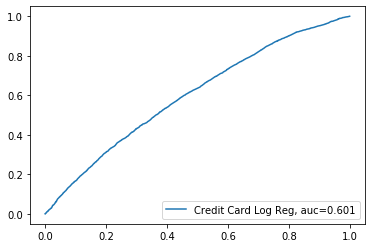

In [54]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(Test_No_WoE['TARGET_LABEL_BAD=1'], logreg_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = Test_No_WoE['TARGET_LABEL_BAD=1'], 
                             y_score = logreg_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Credit Card Log Reg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

4. (20%) Compare your scoring model with an XGBoosting model and Random Forest model trained over the data without the WoE transformation. Use cross-validation to determine your optimal parameters, if necessary, discuss the accuracy metrics you deem relevant. Compare the performance of the three models and discuss your findings. 

In [55]:
from sklearn.ensemble import RandomForestClassifier

## Random Forests

Now we will train a random forest. It is included in the ```sklearn.ensemble``` subpackage, function [```RandomForestClassifier```](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), so it is straightforward to use. It comes with many parameters, but in general there is a philosophy to follow:

- In a Random Forest we want each tree to be large, and to learn as much as possible from its subset of data. We don't care too much if each tree is overadjusted, as we can always increase the number of trees to take care of this.

- This said, a good idea is to limit the minimum number of samples per leaf when we have few cases (this is not usually a problem in large datasets).

- We might want to limit the minimum impurity decrease to stop growing a tree if not much is happening.

- There is also a class weight to include. It does include one automatically if we use the option ```balanced```.

Let's train one and check the options.

In [56]:
#Define the classifier
CCData_rf = RandomForestClassifier(n_estimators=2000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=251093007, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

In [57]:
Train_No_WoE

,PAYMENT_DAY,MARITAL_STATUS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,INCOMEAGE
0,5,6,RN,Y,15.0,595.0,1,28.125000
1,15,2,RJ,Y,1.0,230.0,1,22.058824
2,5,2,RN,Y,6.0,591.0,0,18.518519
3,10,2,RJ,Y,12.0,235.0,1,25.000000
4,25,1,SP,N,4.0,686.0,0,17.464286
...,...,...,...,...,...,...,...,...
34451,1,2,BA,Y,4.0,440.0,1,25.000000
34452,10,1,RN,Y,14.0,591.0,1,40.305556
34453,5,2,SP,Y,5.0,715.0,0,37.926829
34454,1,1,MG,Y,6.0,320.0,1,51.545357


In [58]:
columns_titles = ['PAYMENT_DAY', 'MARITAL_STATUS', 'MONTHS_IN_RESIDENCE', 'RESIDENCIAL_STATE', 
       'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_ZIP_3', 'INCOMEAGE', 'TARGET_LABEL_BAD=1'
       ]
Train_No_WoE=Train_No_WoE.reindex(columns=columns_titles)

Train_No_WoEtest = Train_No_WoE


In [59]:
def phone(row):
    if row['FLAG_RESIDENCIAL_PHONE'] == 'Y':
        val = 1
    else:
        val = 0
    return val


In [60]:
Train_No_WoEtest['FLAG_RESIDENCIAL_PHONE'] = Train_No_WoEtest.apply(phone, axis = 1)

Train_No_WoE = Train_No_WoEtest

In [61]:
Train_No_WoE

,PAYMENT_DAY,MARITAL_STATUS,MONTHS_IN_RESIDENCE,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_ZIP_3,INCOMEAGE,TARGET_LABEL_BAD=1
0,5,6,15.0,RN,1,595.0,28.125000,1
1,15,2,1.0,RJ,1,230.0,22.058824,1
2,5,2,6.0,RN,1,591.0,18.518519,0
3,10,2,12.0,RJ,1,235.0,25.000000,1
4,25,1,4.0,SP,0,686.0,17.464286,0
...,...,...,...,...,...,...,...,...
34451,1,2,4.0,BA,1,440.0,25.000000,1
34452,10,1,14.0,RN,1,591.0,40.305556,1
34453,5,2,5.0,SP,1,715.0,37.926829,0
34454,1,1,6.0,MG,1,320.0,51.545357,1


In [62]:
labels_state, levels_state = pd.factorize(Train_No_WoE["RESIDENCIAL_STATE"])
Train_No_WoE["RESIDENCIAL_STATE"] = pd.Series(labels_state)

In [63]:
Train_No_WoE

,PAYMENT_DAY,MARITAL_STATUS,MONTHS_IN_RESIDENCE,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_ZIP_3,INCOMEAGE,TARGET_LABEL_BAD=1
0,5,6,15.0,0,1,595.0,28.125000,1
1,15,2,1.0,1,1,230.0,22.058824,1
2,5,2,6.0,0,1,591.0,18.518519,0
3,10,2,12.0,1,1,235.0,25.000000,1
4,25,1,4.0,2,0,686.0,17.464286,0
...,...,...,...,...,...,...,...,...
34451,1,2,4.0,10,1,440.0,25.000000,1
34452,10,1,14.0,0,1,591.0,40.305556,1
34453,5,2,5.0,2,1,715.0,37.926829,0
34454,1,1,6.0,5,1,320.0,51.545357,1


In [64]:
# Train the RF.
CCData_rf.fit(Train_No_WoE.iloc[:,:-1], # X 
               Train_No_WoE['TARGET_LABEL_BAD=1']    # y
                )  

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   10.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   16.4s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   23.4s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:   26.1s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=0.001,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2000, n_jobs=2, oob_score=True,
                       random_state=251093007, verbose=1, warm_start=False)

We can see it used two jobs (two processors are available to us in this Google Colab server). It converges very quickly. Let's check how it did, this time we will print a nicer confusion matrix using seaborn, and will plot the ROC curve of the model. 

In [65]:
Test_No_WoE

,PAYMENT_DAY,MARITAL_STATUS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,INCOMEAGE
0,20,2,PE,N,6.0,545.0,0,8.196721
1,10,2,MG,Y,4.0,371.0,1,12.500000
2,15,2,BA,Y,1.0,413.0,1,8.000000
3,15,1,MG,Y,6.0,384.0,0,13.896552
4,1,2,DF,Y,4.0,722.0,0,24.776923
...,...,...,...,...,...,...,...,...
14763,1,5,RS,Y,19.0,962.0,0,8.771930
14764,15,2,SP,N,5.0,882.0,0,7.838235
14765,10,2,RN,Y,5.0,596.0,0,10.937500
14766,10,2,RS,Y,38.0,948.0,1,9.684211


In [66]:
columns_titles = ['PAYMENT_DAY', 'MARITAL_STATUS', 'MONTHS_IN_RESIDENCE', 'RESIDENCIAL_STATE',
       'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_ZIP_3', 'INCOMEAGE', 'TARGET_LABEL_BAD=1'
       ]
Test_No_WoE=Test_No_WoE.reindex(columns=columns_titles)

Test_No_WoEtest = Test_No_WoE

Test_No_WoEtest['FLAG_RESIDENCIAL_PHONE'] = Test_No_WoEtest.apply(phone, axis = 1)

Test_No_WoE = Test_No_WoEtest

In [67]:
Test_No_WoE

,PAYMENT_DAY,MARITAL_STATUS,MONTHS_IN_RESIDENCE,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_ZIP_3,INCOMEAGE,TARGET_LABEL_BAD=1
0,20,2,6.0,PE,0,545.0,8.196721,0
1,10,2,4.0,MG,1,371.0,12.500000,1
2,15,2,1.0,BA,1,413.0,8.000000,1
3,15,1,6.0,MG,1,384.0,13.896552,0
4,1,2,4.0,DF,1,722.0,24.776923,0
...,...,...,...,...,...,...,...,...
14763,1,5,19.0,RS,1,962.0,8.771930,0
14764,15,2,5.0,SP,0,882.0,7.838235,0
14765,10,2,5.0,RN,1,596.0,10.937500,0
14766,10,2,38.0,RS,1,948.0,9.684211,1


In [68]:
labels_state, levels_state = pd.factorize(Test_No_WoE["RESIDENCIAL_STATE"])
Test_No_WoE["RESIDENCIAL_STATE"] = pd.Series(labels_state)

In [69]:
# Apply the model to the test set.
rf_pred_class_test = CCData_rf.predict(Test_No_WoE.iloc[:, :-1])
rf_probs_test = CCData_rf.predict_proba(Test_No_WoE.iloc[:, :-1])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    2.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 2000 

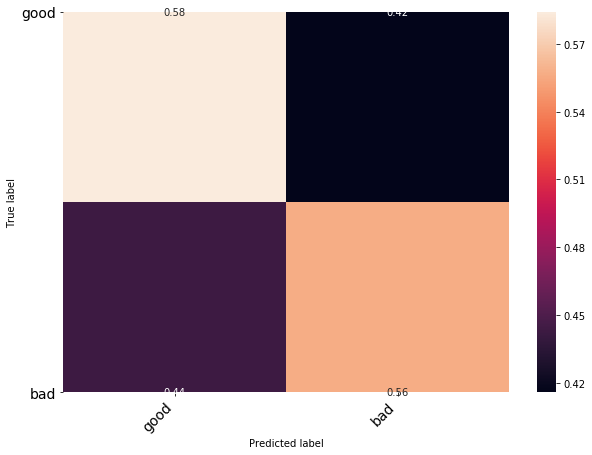

In [70]:
# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = Test_No_WoE['TARGET_LABEL_BAD=1'], 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

Looks a bit unbalanced, but otherwise ok. It's harder to predict the  defaulters. Now let's see the ROC curve.

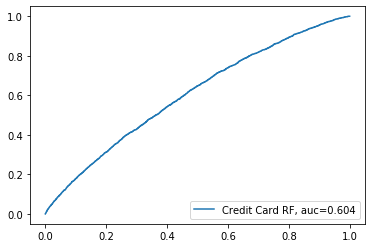

In [71]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(Test_No_WoE['TARGET_LABEL_BAD=1'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = Test_No_WoE['TARGET_LABEL_BAD=1'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Credit Card RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now, let's print the variable importance. The importance is calculated by averaging the accuracy of trees when the variables is included the tree, and comparing it to when it's NOT included the tree.

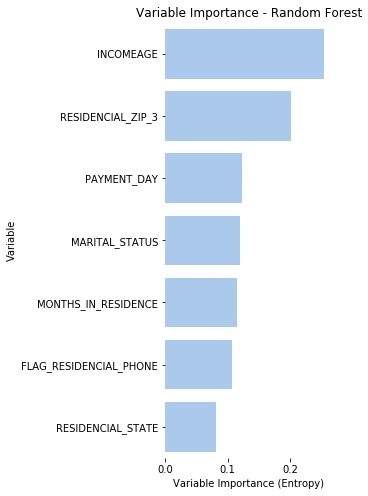

In [72]:
# Plot variable importance
importances = CCData_rf.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[Train_No_WoE.iloc[:, :-1].columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

That's it! Now we'll compare this with an XGBoost and see which one of our three models is better.


## XGBoosting

The stochastic gradient boosting model is the alternative to Random Forest. Now we want to create a series of small trees, which will be poorer in performance, but together they will be stronger. Training an XGBoost model is harder, because we need to control the model so it creates small trees, but it performs better in small data, something Random Forests do not necessarily accomplish.

While scikit-learn does have its own implementation of XGB ([```sklearn.ensemble```](https://scikit-learn.org/stable/modules/ensemble.html)), there are a couple of very strong packages out there that implement the algorithm. ```xgboost``` and ```lightgbm``` are two of the best known ones. We will use [```xgboost```](https://xgboost.readthedocs.io/en/latest/python/) for this lab, available pretty much for every language out there.

The first step is to define a classifier that we will use.

In [73]:
from xgboost import XGBClassifier

In [74]:
Test_No_WoE['TARGET_LABEL_BAD=1'].value_counts()

0    10911
1     3857
Name: TARGET_LABEL_BAD=1, dtype: int64

In [75]:
10911/3857

2.8288825512056004

In [76]:
#Define the classifier.
XGB_Bankloan = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=50,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=2.8288825512056004,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251093007,        # Seed
                            missing=None,                 # How are nulls encoded?
                            #tree_method='gpu_hist',       # How to train the trees?
                            #gpu_id=0                     # With which GPU? 
                            )

This classifier can be used to tune the parameters of the model. We will use sklearn's ```GridSearchCV``` for this. It requires a dictionary of the parameters to look for. We will tune the number of trees (XGB overfits relatively easily, always tune this), the depth, and the learning rate.

In [77]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.0001, 0.001, 0.005, 0.01, 0.05]
                  })

This training process can be very large. We will create a validation set for the sample.

In [78]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = Train_No_WoE.sample(frac = 0.5,               # The fraction to extract
                                       random_state = 251093007,    # The seed.
                                       )

Now we can do a grid search over the parameter space. We will use the AUC (as this is a binary classification problem)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [81]:
# Train grid search. will take about 30-45 sec
GridXGB.fit(val_train.iloc[:, :-1], val_train['TARGET_LABEL_BAD=1'])

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.2s
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed:   52.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=251093007, reg_alpha=1,
                                     reg_lambda=0,
                                     scale_pos_weight=2.8288825512056004,
                                     subsample=0.632, tree_method=None,
                                     validate_parameters=False, verbosity=1),
         

Now we can output the optimal parameters.

In [82]:
# Show best params
print('The best AUC is %.3f' % GridXGB.best_score_)
GridXGB.best_params_

The best AUC is 0.587


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

It is telling us to use 1% learning rate with a max_depth of 2 and 150 trees. As the n_estimators parameter is at the limit, I would run again with a depth of four just to check one further the limit. I leave this as an exercise.

Now we can fit the final model!

In [83]:
# Create XGB with best parameters.
XGB_Bankloan = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            #n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=2.8288825512056004,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251093007,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method='exact',       # How to train the trees?
                            gpu_id=0                      # With which GPU?
                            )

In [84]:
# Train over all training data.
XGB_Bankloan.fit(Train_No_WoE.iloc[:, :-1], Train_No_WoE['TARGET_LABEL_BAD=1'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=251093007, reg_alpha=1,
              reg_lambda=0, scale_pos_weight=2.8288825512056004,
              subsample=0.632, tree_method='exact', validate_parameters=False,
              verbosity=1)

Now we can evaluate our model. First we calculate the variable importance.

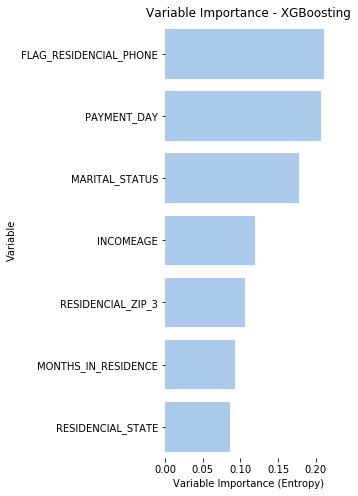

In [85]:
# Plot variable importance
importances = XGB_Bankloan.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[Train_No_WoE.iloc[:, :-1].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

What do you see here? Does it make sense to you?

Let's finish by plotting the evaluation measures. How does it compare to Random Forest? Why do you think this is?

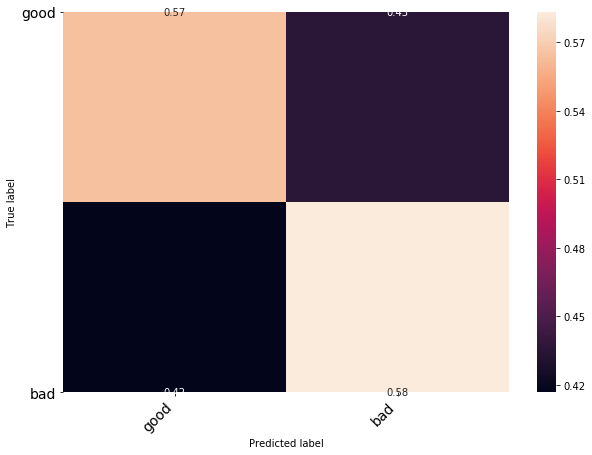

In [86]:
# Calculate probability
XGBClassTest = XGB_Bankloan.predict(Test_No_WoE.iloc[:, :-1])
xg_probs_test = XGB_Bankloan.predict_proba(Test_No_WoE.iloc[:, :-1])
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = Test_No_WoE['TARGET_LABEL_BAD=1'], 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

Very similar results. Now there is no chance to use sample weights sadly, so the solution is a bit more unbalanced. This is not too much of an issue though, as we can always change the cutoff point to account for the unbalance.

Let's check the ROC curve.

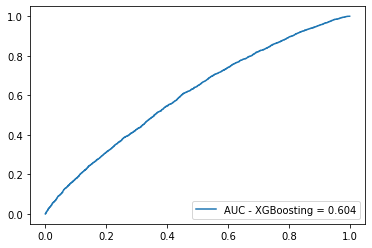

In [87]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(Test_No_WoE['TARGET_LABEL_BAD=1'], 
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = Test_No_WoE['TARGET_LABEL_BAD=1'], 
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

## Plotting multiple ROC curves

The last thing we would like to do is to plot multiple ROC curves in one graph. This is fairly straightforward, we just pass  the ```plt.plot``` command each of the ROC curves. I'll do it dynamically using a dictionary and a for loop. 

In [88]:
test_woe_NoHighCorr  #should be same as CCData_test_WoE in my case
#CCData_test_WoE

,TARGET_LABEL_BAD=1,FLAG_RESIDENCIAL_PHONE_woe,RESIDENCIAL_ZIP_3_woe,MARITAL_STATUS_woe,RESIDENCIAL_STATE_woe,INCOMEAGE_woe,PAYMENT_DAY_woe,MONTHS_IN_RESIDENCE_woe
3,0,0.291348,0.024679,-0.111896,0.047566,-0.015563,0.172339,-0.012177
5,1,-0.062530,0.024679,-0.111896,-0.020388,-0.015563,-0.130945,0.142051
6,1,-0.062530,0.024679,-0.111896,0.047566,-0.015563,0.052341,-0.011880
11,0,-0.062530,0.024679,0.216458,-0.020388,-0.015563,0.052341,-0.012177
22,0,-0.062530,0.024679,-0.111896,0.170207,0.104764,-0.130945,0.142051
...,...,...,...,...,...,...,...,...
49986,0,-0.062530,-0.324489,0.093198,-0.185218,-0.015563,-0.130945,-0.105293
49987,0,0.291348,-0.391206,-0.111896,-0.020388,-0.163181,0.052341,0.142051
49989,0,-0.062530,0.024679,-0.111896,0.170207,-0.015563,-0.130945,0.142051
49994,1,-0.062530,0.068544,-0.111896,-0.185218,-0.015563,-0.130945,-0.289696


In [89]:
# Predict probabilities of scorecard.
logreg_probs_test = CCData_logreg.predict_proba(CCData_test_WoE.iloc[:, 1:])

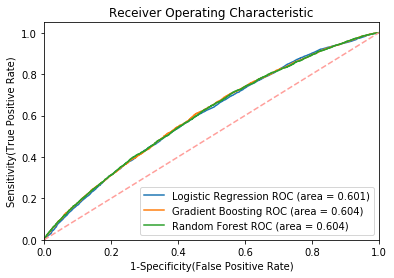

In [90]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': logreg_probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
    'probs': xg_probs_test
},
{
    'label': 'Random Forest',
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = Test_No_WoE['TARGET_LABEL_BAD=1'], 
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(Test_No_WoE['TARGET_LABEL_BAD=1'], 
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()

Interesting results, no?

I introduced several new concepts here. First, a dictionary. A dictionary is a very useful structure, which allows to have values indexed by a name. Every item will have their own values for its name, here the 'label' and 'probs'. I use this as an input for the for loop.

Second, check the part

```
label='%s ROC (area = %0.3f)' % (m['label'], auc)
```

of the plot definition. Note the ```%s``` and ```%0.3f``` in the string. This is a magic command that tells Python "this is a variable, in a certain format. Go look for it outside and match it in order". So in this case we have two:

- An ```%s``` which means 'This is a string'.
- A ```%0.3f``` which means 'This is a float (decimal), and I want it formatted using three decimals'.

Outside the string there is a ```% (m['label'], auc)```. This is matched one by one, the ```%s``` to the ```m['label']``` (the string), and the ```%0.3f``` to the ```auc```. This way I can create dynamically labels. Remember to use these tricks to simplify your life! 

# Cuttoff
5. (10%) Discuss the variable importance for all models. Do they agree? Why? 
6. (10%) Assume the company gives every approved borrower a credit card with a one-month salary credit limit. Furthermore, assume that the interest rate the credit card charges is 20% per year over the used limit, with an average utilization of 32% of the approved limit. Designa two-cut-off point strategy for your scorecard and discuss its results.

In [91]:
#Applying the credit score over the original data!
df1drop["INCOMEAGE"] = (df1drop["PERSONAL_MONTHLY_INCOME"] + df1drop["OTHER_INCOMES"])/df1drop["AGE"]
df1drop["TOTALINCOME"] = df1drop["PERSONAL_MONTHLY_INCOME"] + df1drop["OTHER_INCOMES"]

In [92]:
df1drop

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,...,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,ALLOTHCARDS,HASOTHCARDS,INCOMEPERDEP,INCOMEAGE,TOTALINCOME,SCORECARDVALUE
0,1,5,1,6,1,RN,Y,1.0,15.0,1,...,1,32.0,595.0,1,2,1,450.000000,28.125000,900.00,416.0
1,2,15,2,2,0,RJ,Y,1.0,1.0,1,...,1,34.0,230.0,1,0,0,750.000000,22.058824,750.00,420.0
2,3,5,1,2,0,RN,Y,1.0,6.0,1,...,1,27.0,591.0,0,0,0,500.000000,18.518519,500.00,425.0
3,4,20,1,2,0,PE,N,1.0,6.0,1,...,1,61.0,545.0,0,0,0,500.000000,8.196721,500.00,381.0
4,5,10,1,2,0,RJ,Y,1.0,12.0,1,...,1,48.0,235.0,1,0,0,1200.000000,25.000000,1200.00,436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,10,0,1,2,RN,Y,1.0,14.0,1,...,1,36.0,591.0,1,0,0,483.666667,40.305556,1451.00,407.0
49996,49997,25,0,1,0,SP,Y,1.0,15.0,1,...,2,21.0,186.0,0,0,0,450.000000,21.428571,450.00,387.0
49997,49998,5,1,2,3,SP,Y,2.0,5.0,1,...,1,41.0,715.0,0,0,0,388.750000,37.926829,1555.00,425.0
49998,49999,1,1,1,1,MG,Y,1.0,6.0,1,...,1,28.0,320.0,1,0,0,721.635000,51.545357,1443.27,411.0


In [93]:
df1drop["SCORECARDVALUE"] = sc.scorecard_ply(df1drop, bankloan_sc, print_step=0)

C:\ANACONDA3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ANACONDA3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [94]:
df1drop["SCORECARDVALUE"].describe()

count    49224.000000
mean       420.330144
std         26.094583
min        324.000000
25%        403.000000
50%        420.000000
75%        436.000000
max        523.000000
Name: SCORECARDVALUE, dtype: float64

In [95]:
df1drop["scorebin"] = 0

In [96]:
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values < 350)] = 1
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=350) & (df1drop.SCORECARDVALUE.values < 375)] = 2
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=375) & (df1drop.SCORECARDVALUE.values < 400)] = 3
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=400) & (df1drop.SCORECARDVALUE.values < 425)] = 4
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=425) & (df1drop.SCORECARDVALUE.values < 450)] = 5
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=450) & (df1drop.SCORECARDVALUE.values < 475)] = 6
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=475) & (df1drop.SCORECARDVALUE.values < 500)] = 7
df1drop.scorebin.values[(df1drop.SCORECARDVALUE.values>=500) & (df1drop.SCORECARDVALUE.values < 525)] = 8


In [97]:
df1drop["scorebin"].describe()

count    49224.000000
mean         4.342455
std          1.080438
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: scorebin, dtype: float64

In [98]:
def profit(row):
    if row["TARGET_LABEL_BAD=1"] == 1:
        val = -row["TOTALINCOME"] * 0.32
    elif row["TARGET_LABEL_BAD=1"] == 0:
        val = row["TOTALINCOME"] * (0.2) * 0.32
    return val

In [99]:
df1drop['Profit'] = df1drop.apply(profit, axis=1)

In [100]:
df1drop['Profit'].describe()

count    49224.000000
mean       -24.018954
std        156.131954
min      -2740.160000
25%        -88.640000
50%         25.536000
75%         44.480000
max        636.416000
Name: Profit, dtype: float64

In [101]:
eightmean = df1drop[df1drop['scorebin'] == 8]['Profit'].mean()
sevenmean = df1drop[df1drop['scorebin'] == 7]['Profit'].mean()
sixmean = df1drop[df1drop['scorebin'] == 6]['Profit'].mean()
fivemean = df1drop[df1drop['scorebin'] == 5]['Profit'].mean()
fourmean = df1drop[df1drop['scorebin'] == 4]['Profit'].mean()
threemean = df1drop[df1drop['scorebin'] == 3]['Profit'].mean()
twomean = df1drop[df1drop['scorebin'] == 2]['Profit'].mean()
onemean = df1drop[df1drop['scorebin'] == 1]['Profit'].mean()

In [102]:
eightcount = df1drop[df1drop['scorebin'] == 8]['scorebin'].count()
sevencount = df1drop[df1drop['scorebin'] == 7]['scorebin'].count()
sixcount = df1drop[df1drop['scorebin'] == 6]['scorebin'].count()
fivecount = df1drop[df1drop['scorebin'] == 5]['scorebin'].count()
fourcount = df1drop[df1drop['scorebin'] == 4]['scorebin'].count()
threecount = df1drop[df1drop['scorebin'] == 3]['scorebin'].count()
twocount = df1drop[df1drop['scorebin'] == 2]['scorebin'].count()
onecount = df1drop[df1drop['scorebin'] == 1]['scorebin'].count()

In [103]:
def totalprofit(row):
    if row['scorebin'] == 8:
        val = eightmean*eightcount
    elif row['scorebin'] == 7:
        val = sevenmean*sevencount
    elif row['scorebin'] == 6:
        val = sixmean*sixcount
    elif row['scorebin'] == 5:
        val = fivemean*fivecount
    elif row['scorebin'] == 4:
        val = fourmean*fourcount
    elif row['scorebin'] == 3:
        val = threemean*threecount
    elif row['scorebin'] == 2:
        val = twomean*twocount
    elif row['scorebin'] == 1:
        val = onemean*onecount
    return val

In [104]:
df1drop['Totalprofit'] = df1drop.apply(totalprofit, axis = 1)

In [105]:
cutoff_table = df1drop[['scorebin', 'Totalprofit']]
cutoff_tab = cutoff_table.groupby(['scorebin'])['Totalprofit']
cutoff_tab.describe().reset_index().sort_values('scorebin', ascending = False)

,scorebin,count,mean,std,min,25%,50%,75%,max
7,8,106.0,1127.82528,1.370723e-12,1127.82528,1127.82528,1127.82528,1127.82528,1127.82528
6,7,1044.0,9797.24544,7.279445e-12,9797.24544,9797.24544,9797.24544,9797.24544,9797.24544
5,6,4920.0,29556.31936,5.639440e-10,29556.31936,29556.31936,29556.31936,29556.31936,29556.31936
4,5,15659.0,-184288.39360,1.399939e-08,-184288.39360,-184288.39360,-184288.39360,-184288.39360,-184288.39360
3,4,17445.0,-522617.04000,2.834794e-08,-522617.04000,-522617.04000,-522617.04000,-522617.04000,-522617.04000
2,3,8056.0,-386780.77824,5.093486e-08,-386780.77824,-386780.77824,-386780.77824,-386780.77824,-386780.77824
1,2,1840.0,-115373.70624,1.441031e-09,-115373.70624,-115373.70624,-115373.70624,-115373.70624,-115373.70624
0,1,154.0,-13730.47104,2.189909e-11,-13730.47104,-13730.47104,-13730.47104,-13730.47104,-13730.47104


In [106]:
def profit(T,df1drop):
    
    def g(row):
        if row["SCORECARDVALUE"] > T:
            return(0) # good
        else: 
            return(1) # bad 
    
    df1drop["Decision"] = df1drop.apply(g, axis = 1)
        
    def goodgood(row):
        if (row["TARGET_LABEL_BAD=1"] == 0) and (row["Decision"] ==0):
            return(1)
        else: 
            return(0)
    
    df1drop["goodgood"] = df1drop.apply(goodgood, axis = 1)

 
    def badbad(row):
        if (row["TARGET_LABEL_BAD=1"] == 1) and (row["Decision"] ==1):
            return(1)
        else: 
            return(0)


    def badgood(row): # the person is bad, but you predict good
        if (row["TARGET_LABEL_BAD=1"] == 1) and (row["Decision"] ==0):
            return(1)
        else: 
            return(0)
    
    df1drop["badgood"] = df1drop.apply(badgood, axis = 1)

    
    
    df1drop["badbad"] = df1drop.apply(badbad, axis = 1)
    
 
    numbad =  sum(df1drop["TARGET_LABEL_BAD=1"])
    numgood =  len(df1drop["TARGET_LABEL_BAD=1"]) - numbad


    numpredbad = sum(df1drop["Decision"])
    numbadbad = sum(df1drop["badbad"])

    numpredgood = len(df1drop["Decision"]) - numpredbad
    numgoodgood = sum(df1drop["goodgood"])

    goodacc = numgoodgood/numpredgood
    badacc = numbadbad/numpredbad

    
    ar = 0.2
    #mr = (1+ar)**0.25 - 1
    
    df1drop["revenue"] = 0.32*df1drop["TOTALINCOME"]*ar*df1drop["goodgood"]
    
    df1drop["cost"] = 0.32*df1drop["TOTALINCOME"]*df1drop["badgood"]
    
    
    rev =  sum(df1drop["revenue"])
    cost = sum(df1drop["cost"])
    avg_rev = rev/numpredgood
    avg_cost = cost/numpredgood
    
    total_profit = rev - cost
    avg_profit = total_profit/numpredgood
    
    return [T, goodacc, badacc, avg_rev, avg_cost, total_profit, avg_profit]

In [107]:
cut_vec = np.quantile(df1drop['SCORECARDVALUE'],[0.1*i for i in range(1,10)])

In [108]:
print(df1drop['SCORECARDVALUE'].min())
print(df1drop['SCORECARDVALUE'].max())

324.0
523.0


In [109]:
cut_vec = range(324,523)

In [110]:
rows = []

for i in cut_vec:
    rows.append(profit(i, df1drop))
    print(rows)
    #print(profit(i, df_final))

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596]]
[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966]]
[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966]]
[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.33333333

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

[[324, 0.7388415984397537, 0.0, 34.38753622005744, 58.407858570181034, -1182352.3270401338, -24.020322350123596], [325, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [326, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [327, 0.7388513033054996, 0.3333333333333333, 34.38842118932747, 58.40470576380043, -1182105.5430401338, -24.016284574472966], [328, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [329, 0.7388459975619667, 0.25, 34.38809393254545, 58.40589236895614, -1182156.0390401338, -24.017798436410683], [330, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [331, 0.7388751168366725, 0.4, 34.386593070262265, 58.39644536920431, -1181620.8710401335, -24.00985229894204], [332, 0.7388751168366725, 0.4, 34.386593070262265, 58.3

In [111]:
finaltable = pd.DataFrame(rows, columns=["Cutoff", "GoodAcc", "BadAcc", "AvgRev", "AvgCost", "TotalProfit", "AvgProfit"])
finaltable

,Cutoff,GoodAcc,BadAcc,AvgRev,AvgCost,TotalProfit,AvgProfit
0,324,0.738842,0.000000,34.387536,58.407859,-1.182352e+06,-24.020322
1,325,0.738851,0.333333,34.388421,58.404706,-1.182106e+06,-24.016285
2,326,0.738851,0.333333,34.388421,58.404706,-1.182106e+06,-24.016285
3,327,0.738851,0.333333,34.388421,58.404706,-1.182106e+06,-24.016285
4,328,0.738846,0.250000,34.388094,58.405892,-1.182156e+06,-24.017798
...,...,...,...,...,...,...,...
194,518,1.000000,0.261206,20.095552,0.000000,2.009555e+02,20.095552
195,519,1.000000,0.261158,22.400000,0.000000,2.240000e+01,22.400000
196,520,1.000000,0.261158,22.400000,0.000000,2.240000e+01,22.400000
197,521,1.000000,0.261158,22.400000,0.000000,2.240000e+01,22.400000


In [112]:
finaltable.iloc[109:124, :]

,Cutoff,GoodAcc,BadAcc,AvgRev,AvgCost,TotalProfit,AvgProfit
109,433,0.818909,0.297098,34.902886,36.303141,-21356.69440,-1.400255
110,434,0.823780,0.293604,33.832147,33.673834,2154.32320,0.158313
111,435,0.826667,0.293083,33.920914,33.215007,9265.03744,0.705908
112,436,0.829496,0.290754,32.303440,31.113378,14419.98080,1.190062
113,437,0.830235,0.290078,32.298126,30.801974,17705.46944,1.496153
114,438,0.831667,0.289777,32.395878,30.593540,20910.72832,1.802338
115,439,0.834688,0.288181,31.323988,28.796368,27369.07328,2.527620
116,440,0.840657,0.286490,31.370270,27.641868,36571.89632,3.728402
117,441,0.841312,0.285606,31.403636,27.667641,35432.17792,3.735995
118,442,0.843259,0.284623,30.664014,26.462745,37954.27136,4.201270


In [113]:
finaltable['AvgProfit'].max()

22.400000000000002

In [114]:
finaltable[finaltable['AvgProfit'] >= 22.4]

,Cutoff,GoodAcc,BadAcc,AvgRev,AvgCost,TotalProfit,AvgProfit
195,519,1.0,0.261158,22.4,0.0,22.4,22.4
196,520,1.0,0.261158,22.4,0.0,22.4,22.4
197,521,1.0,0.261158,22.4,0.0,22.4,22.4
198,522,1.0,0.261158,22.4,0.0,22.4,22.4


In [115]:
finaltable['TotalProfit'].max()

47738.41983999708

In [116]:
finaltable[finaltable['TotalProfit'] > 41991]

,Cutoff,GoodAcc,BadAcc,AvgRev,AvgCost,TotalProfit,AvgProfit
121,445,0.852206,0.280958,30.959504,24.786720,45190.94912,6.172784
122,446,0.853168,0.280131,30.589899,23.777910,47738.41984,6.811989
123,447,0.854627,0.279395,29.801573,23.354196,43197.42976,6.447378
